In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [67]:
# reading the dataset

lccs = pd.read_csv('loan.csv')
lccs.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [68]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seabonrn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

# Removing Columns with null values

In [69]:
##Identify columns with all NA values >= 60% by count
loan_df = pd.read_csv('loan.csv')
print('Initial Shape :',loan_df.shape)
df_cols = pd.DataFrame(loan_df.isna().mean()*100)

df_cols_with_na = df_cols[df_cols[0] >= 60]
df_cols_with_na.index.name = 'col_name'
df_cols_with_na.reset_index(inplace=True)
na_list = df_cols_with_na['col_name'].tolist()

## dropping those columns with 60% missing data
loan_df.drop(na_list, axis =1, inplace = True)
print('Shape Post Dropping Columns:',loan_df.shape)
loan_df.columns

Initial Shape : (39717, 111)
Shape Post Dropping Columns: (39717, 54)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [70]:
# Data types of each column
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

# Filtering the data (Target Variable)
Selecting the loans_status other than 'current', as we cannot derive insights from these running loans.
So considering only 'Charged-off' and 'Fully-paid' loans in the dataset.

In [71]:
loan_df = loan_df[loan_df['loan_status'] != 'Current']
print('Shape of the dataframe with Charged-off and Fully-paid loans: ',loan_df.shape)

Shape of the dataframe with Charged-off and Fully-paid loans:  (38577, 54)


## Checking for Columns containing Single Value and dropping them from the dataset as they are irrelevant for the analysis

In [72]:
loan_df.nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25803
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

In [73]:
#shape before dropping
print('shape of dataframe before dropping : ',loan_df.shape)

# Identifying & dropping the columns containing 0/nan since they will not be adding any value to the analysis
print('unique values in collections_12_mths_ex_med:', loan_df['collections_12_mths_ex_med'].unique())
print('unique values in acc_now_delinq:', loan_df['acc_now_delinq'].unique())
print('unique values in chargeoff_within_12_mths:', loan_df['chargeoff_within_12_mths'].unique())
print('unique values in delinq_amnt:', loan_df['delinq_amnt'].unique())
print('unique values in pymnt_plan:', loan_df['pymnt_plan'].unique())
print('unique values in tax_liens:', loan_df['tax_liens'].unique())
print('unique values in out_prncp:', loan_df['out_prncp'].unique())
print('unique values in out_prncp_inv:', loan_df['out_prncp_inv'].unique())


loan_df.drop(['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pymnt_plan' , 
              'tax_liens','out_prncp','out_prncp_inv'], axis=1,inplace = True)

print('shape of dataframe post dropping 0/nan valued columns :',loan_df.shape)

shape of dataframe before dropping :  (38577, 54)
unique values in collections_12_mths_ex_med: [ 0. nan]
unique values in acc_now_delinq: [0]
unique values in chargeoff_within_12_mths: [ 0. nan]
unique values in delinq_amnt: [0]
unique values in pymnt_plan: ['n']
unique values in tax_liens: [ 0. nan]
unique values in out_prncp: [0.]
unique values in out_prncp_inv: [0.]
shape of dataframe post dropping 0/nan valued columns : (38577, 46)


In [74]:
# Dropping the columns containing only single value, These are not adding any value to analysis
print('shape of dataframe before dropping single valued columns : ',loan_df.shape)
print('unique values in application_type:', loan_df['application_type'].unique())
print('unique values in policy_code:', loan_df['policy_code'].unique())
print('unique values in initial_list_status:', loan_df['initial_list_status'].unique())

loan_df.drop(['initial_list_status','application_type','policy_code'], axis=1, inplace = True)
print('shape of dataframe post dropping single valued columns :',loan_df.shape)

shape of dataframe before dropping single valued columns :  (38577, 46)
unique values in application_type: ['INDIVIDUAL']
unique values in policy_code: [1]
unique values in initial_list_status: ['f']
shape of dataframe post dropping single valued columns : (38577, 43)


In [75]:
# dropping the columns which cannot be included in analysis, as they have very wide-spread subjective data.
print('shape of dataframe before dropping wide spread columns :',loan_df.shape)

loan_df.drop(['url','desc','id'], axis=1, inplace = True)

print('shape of dataframe post dropping wide spread columns :',loan_df.shape)

shape of dataframe before dropping wide spread columns : (38577, 43)
shape of dataframe post dropping wide spread columns : (38577, 40)


# Checking NA or missing values in the subset across columns

In [76]:
loan_df.isna().sum()/len(loan_df) *100

member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.185033
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028514
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0

# Treating Missing values

In [77]:
print('Mode of employment length:', loan_df['emp_length'].mode()[0])
loan_df.emp_length.value_counts()

Mode of employment length: 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

# The above value counts shows that the mode value has frequency value greater than that of the second most frequent value.
1. This means that we can safely assign the value of mode to the null values in the column.

2. The missing values are in very low percentage and therefore imputing these with mode value will not impact the analysis in anyway.

In [78]:
emp_len_mode = loan_df['emp_length'].mode()[0]
loan_df['emp_length'].fillna(emp_len_mode , inplace = True)
loan_df['emp_length'].isna().sum()

0

In [79]:
print('Mode of revolving utilization rate:', loan_df['revol_util'].mode()[0])
loan_df.revol_util.value_counts()

Mode of revolving utilization rate: 0%


0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

Similar to employment length, treatment for missing values is performed for the revolving utilization rate

In [80]:
revol_util_mode = loan_df['revol_util'].mode()[0]
loan_df['revol_util'].fillna(revol_util_mode , inplace = True)
loan_df['revol_util'].isna().sum()

0

In [81]:
print('Mode of public record bankruptcies:', loan_df['pub_rec_bankruptcies'].mode())
loan_df.pub_rec_bankruptcies.value_counts()

Mode of public record bankruptcies: 0    0.0
Name: pub_rec_bankruptcies, dtype: float64


0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

Treatment of missing values for public record of bankruptcies

In [82]:
pub_rec_bankruptcies_mode = loan_df['pub_rec_bankruptcies'].mode()[0]
loan_df['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode , inplace = True)
loan_df['pub_rec_bankruptcies'].isna().sum()

0

In [83]:
# categorising major columns into categorical, numerical variables and loan attribute columns
cat_cols = ['term','grade','sub_grade','home_ownership','verification_status','loan_status', 'purpose','zip_code',
           'addr_state']

num_cols = ['emp_length','annual_inc','delinq_2yrs','inq_last_6mths','total_rec_prncp','total_rec_int','total_rec_late_fee',
           'recoveries','collection_recovery_fee','earliest_cr_line']

loan_att_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','dti','open_acc','pub_rec',
                 'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                 'total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','pub_rec_bankruptcies']


# standardizing data

Extracting numeric part from alpha numeric data for easy understanding.

Treating special characters from data eg:%, <.

Creating flag based columns for some of the categorical columns of String type.

Deriving log scale columns for widely dispersed continuous data.

Deriving Year column from 'early_credit_line' data.

In [84]:
# data manipulation. considering the numeric part of the data for convenience
loan_df['term'].replace(' 36 months', 36, inplace =True)
loan_df['term'].replace(' 60 months', 60, inplace =True)

In [85]:
# converting the 'emp_length' column to int from string.
loan_df['emp_length'].replace('< 1 year', '0 years', inplace = True)
loan_df['emp_length'].replace('10+ years', '10 years', inplace = True)
print(loan_df['emp_length'].unique())
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x if pd.isnull(x) else float(x.split(' ')[0]))
print(loan_df['emp_length'].unique())

['10 years' '0 years' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years']
[10.  0.  3.  8.  9.  4.  5.  1.  6.  2.  7.]


In [86]:
# since 'int_rate' is a string datatype, converting it into float
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(x.strip('%')))

In [87]:
# since 'revol_util' is a string datatype, converting it into float
loan_df.revol_util = loan_df.revol_util.apply(lambda x: float(x.strip('%')))

In [88]:
# creating a numeric value field for loan_status; 0 for Charged Off and 1 for Fully Paid
loan_df['loan_status_flag'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)

In [89]:
#converting 'annual_inc' to 'log_annual_inc', i.e. log of annual income in order to make it fit for use through box-plot and check outliers
loan_df['log_annual_inc'] = loan_df['annual_inc'].apply(lambda x: np.log10(x))

In [90]:
# log transformation of revol_bal data as they are widely spread, which can be seen from above table's 25%ile and 75%ile 
loan_df['log_revol_bal'] = loan_df['revol_bal'].apply(lambda x: np.log10(x))

In [91]:
# earliest_cr_line
# converting the 'earliset_cr_line' to only 'Year' for looking into the history of Credit line Issued
import datetime

def pickDate(earliest_cr_line):
    dt = int(datetime.datetime.strptime(earliest_cr_line, '%b-%y').strftime('%Y'))
    
    if (dt >= 2030):
        dt-=100
    return dt 
loan_df['earliest_cr_line_yr'] = loan_df.earliest_cr_line.apply(pickDate)
print(loan_df.earliest_cr_line_yr)

0        1985
1        1999
2        2001
3        1996
5        2004
         ... 
39712    1990
39713    1986
39714    1998
39715    1988
39716    2003
Name: earliest_cr_line_yr, Length: 38577, dtype: int64


# Treatment of Outliers

In [92]:
def outlier_treat(df , trea_col, perc):
    upper_data = df[trea_col].quantile(perc)
    return df[df[trea_col] <= upper_data]

In [93]:
#annual_incm
loan_df = outlier_treat(loan_df,'annual_inc',0.95)
loan_df.annual_inc.describe()


count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64


<Axes: >

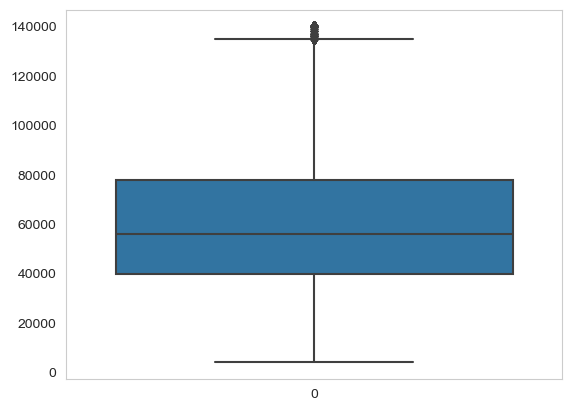

In [94]:
print(loan_df.annual_inc.describe())
sns.boxplot(loan_df['annual_inc'])

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

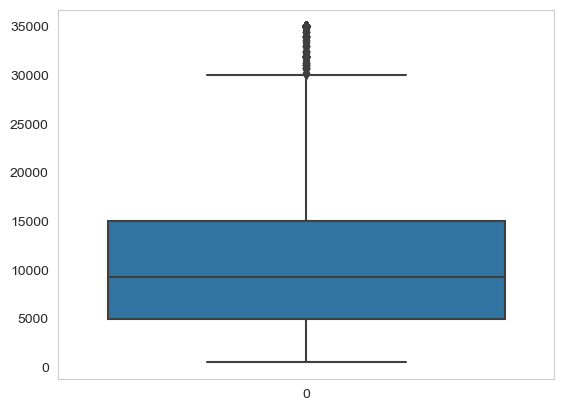

In [95]:
print(loan_df.loan_amnt.describe())
sns.boxplot(loan_df['loan_amnt'])

count    36654.000000
mean     10436.144077
std       6800.636737
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt, dtype: float64


<Axes: >

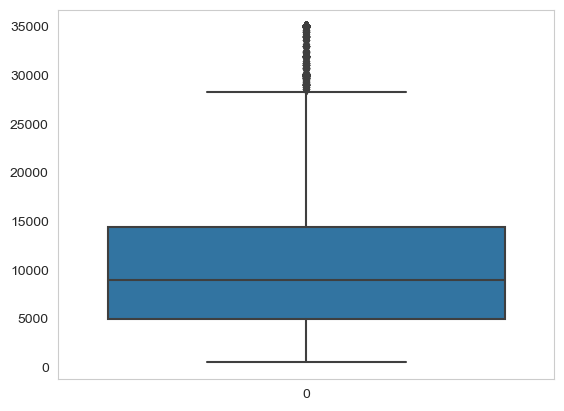

In [96]:
print(loan_df.funded_amnt.describe())
sns.boxplot(loan_df['funded_amnt'])

count    36654.000000
mean      9894.181349
std       6730.756232
min          0.000000
25%       4975.000000
50%       8375.000000
75%      13623.731415
max      35000.000000
Name: funded_amnt_inv, dtype: float64


<Axes: >

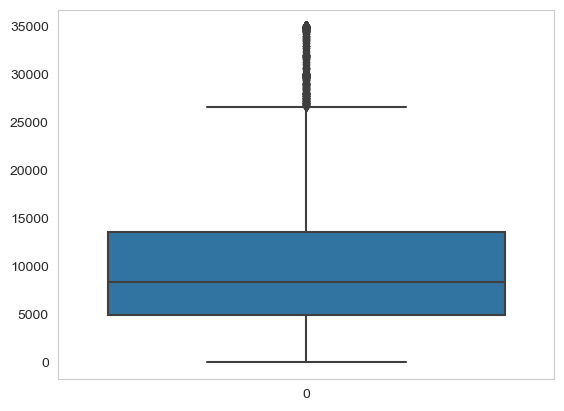

In [97]:
print(loan_df.funded_amnt_inv.describe())
sns.boxplot(loan_df['funded_amnt_inv'])

count    36654.000000
mean        48.596019
std         28.319039
min          0.000000
25%         25.200000
50%         48.900000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64


<Axes: >

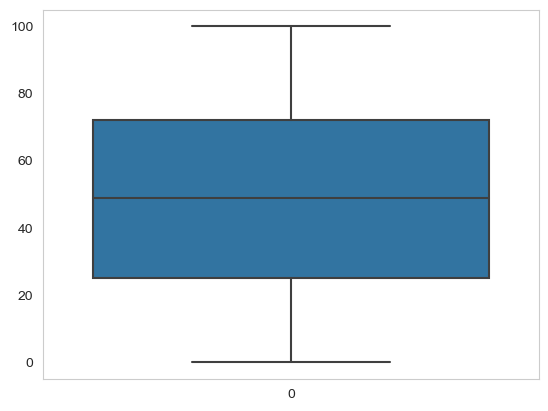

In [98]:
print(loan_df.revol_util.describe())
sns.boxplot(loan_df['revol_util'])

count     36654.000000
mean      12312.872265
std       13768.342283
min           0.000000
25%        3554.000000
50%        8498.000000
75%       16156.750000
max      149000.000000
Name: revol_bal, dtype: float64
0.90    26949.00
0.95    36774.75
0.99    69854.96
Name: revol_bal, dtype: float64


<Axes: >

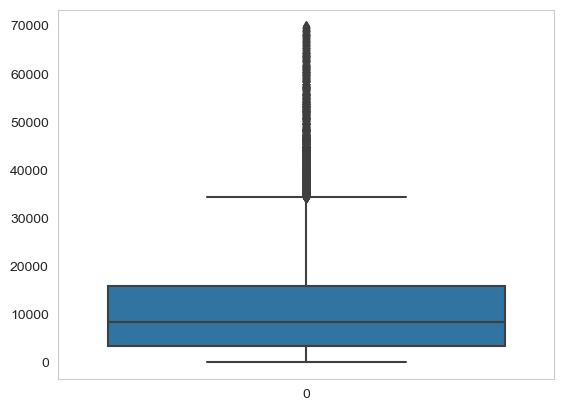

In [99]:
print(loan_df.revol_bal.describe())
print(loan_df.revol_bal.quantile([0.90,0.95,0.99]))
loan_df = outlier_treat(loan_df,'revol_bal',0.99)
sns.boxplot(loan_df['revol_bal'])

count    36287.000000
mean       310.798733
std        198.383882
min         15.690000
25%        162.870000
50%        269.520000
75%        407.170000
max       1305.190000
Name: installment, dtype: float64
0.90    586.34
0.95    702.26
0.99    896.22
Name: installment, dtype: float64


<Axes: >

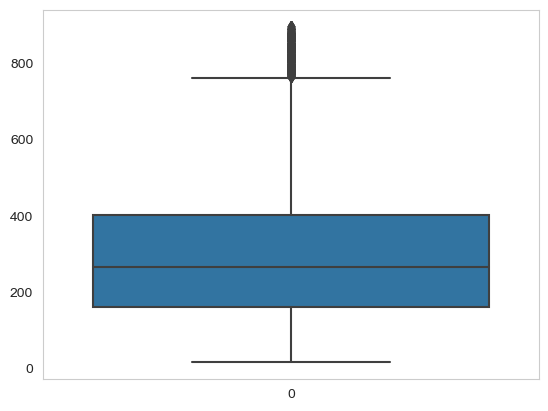

In [100]:
print(loan_df.installment.describe())
print(loan_df.installment.quantile([0.90,0.95,0.99]))
loan_df = outlier_treat(loan_df,'installment',0.99)
sns.boxplot(loan_df['installment'])

count    35927.000000
mean     11163.137528
std       8014.416710
min          0.000000
25%       5357.495672
50%       9246.920000
75%      15141.105665
max      53612.089680
Name: total_pymnt, dtype: float64
0.90    22393.366604
0.95    27436.369986
0.99    36621.344295
Name: total_pymnt, dtype: float64


<Axes: >

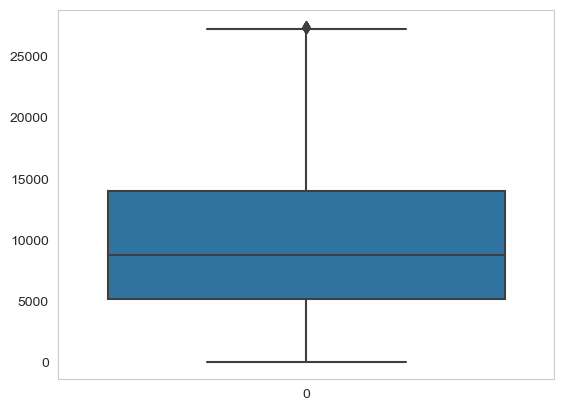

In [101]:
print(loan_df.total_pymnt.describe())
print(loan_df.total_pymnt.quantile([0.90,0.95,0.99]))
loan_df = outlier_treat(loan_df,'total_pymnt',0.95)
sns.boxplot(loan_df['total_pymnt'])

count    34130.000000
mean      1672.482613
std       1565.879000
min          0.000000
25%        595.865000
50%       1167.305000
75%       2236.480000
max      13482.630000
Name: total_rec_int, dtype: float64
0.90    3765.3750
0.95    4911.2330
0.99    7423.1728
Name: total_rec_int, dtype: float64


<Axes: >

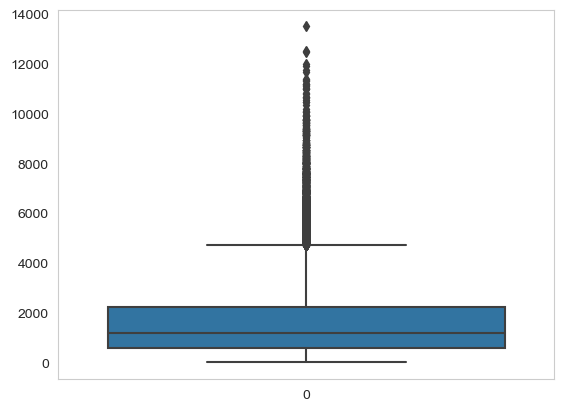

In [102]:
print(loan_df.total_rec_int.describe())
print(loan_df.total_rec_int.quantile([0.90,0.95,0.99]))
sns.boxplot(loan_df['total_rec_int'])

count    34130.000000
mean        13.345756
std          6.683005
min          0.000000
25%          8.190000
50%         13.450000
75%         18.650000
max         29.990000
Name: dti, dtype: float64
0.90    22.3600
0.95    23.8455
0.99    26.6171
Name: dti, dtype: float64


<Axes: >

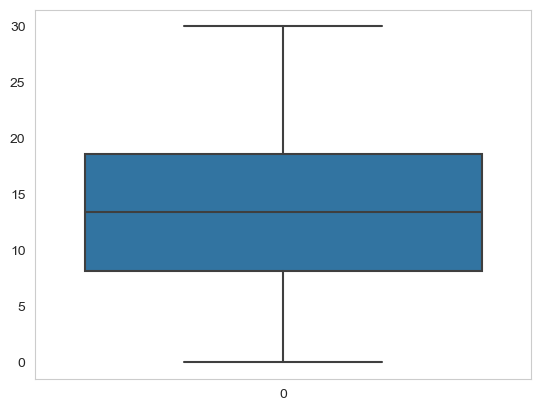

In [103]:
print(loan_df.dti.describe())
print(loan_df.dti.quantile([0.90,0.95,0.99]))
sns.boxplot(loan_df['dti'])

The preprocessing of data is complete and thereby now we move on to the univariate analysis to understand the relationship of various attributes with the target variable to derive meaningful insights

## Univariate Analysis

In [104]:
# distribution of 'term' of the loan
loan_df.groupby('term').size()/len(loan_df) * 100

term
36    77.978318
60    22.021682
dtype: float64

In [105]:
loan_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_status_flag,log_annual_inc,log_revol_bal,earliest_cr_line_yr
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,4.380211,4.135069,1985
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,4.477121,3.227115,1999
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,4.088207,3.470704,2001
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,4.691965,3.748033,1996
5,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,4.556303,3.901077,2004


In [106]:
# distribution of 'loan_status' of the loan
loan_df.loan_status.value_counts(normalize = True)*100

Fully Paid     84.685028
Charged Off    15.314972
Name: loan_status, dtype: float64

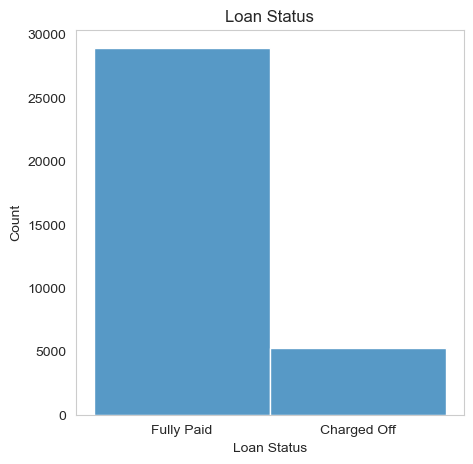

In [107]:
plt.figure(figsize=(5,5))
ax=sns.histplot(loan_df.loan_status)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

Observation: As per the above derived data, we observe that Charged off loans make up for 15.3% of the overall loans compared to fully paid which contributes to the rest 84.7%

# Term of loan

1    88.569926
0    11.430074
Name: loan_status_flag, dtype: float64


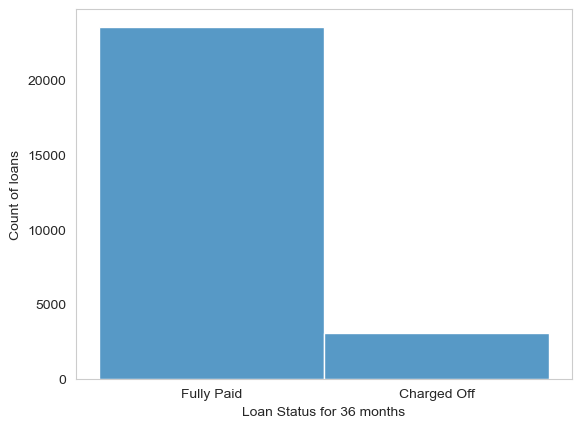

In [108]:
#The loan tenure of charged off vs fully repoaid in 36 months
loan_df_36 = loan_df[loan_df.term == 36]
sns.histplot(loan_df_36.loan_status)
plt.xlabel('Loan Status for 36 months')
plt.ylabel('Count of loans')
print(loan_df_36.loan_status_flag.value_counts(normalize = True)*100)

1    70.928685
0    29.071315
Name: loan_status_flag, dtype: float64


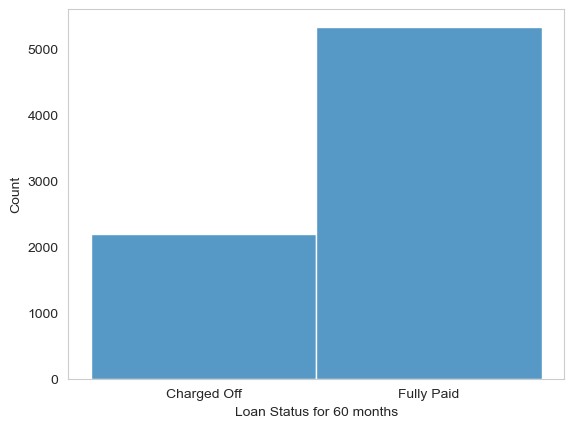

In [109]:
#The loan tenure of charged off vs fully repoaid in 60 months
loan_df_60 = loan_df[loan_df.term == 60]
sns.histplot(loan_df_60.loan_status)
plt.xlabel('Loan Status for 60 months')
print(loan_df_60.loan_status_flag.value_counts(normalize = True)*100)

Inference: From the above plot and computation it is observed that loan with higher term i.e. 60 months shows higher Charged off percentage i.e approx 30 percent. This is an indication to some extent that loans with higher term period are likely to default more

# Home Ownership type

In [110]:
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        50.553765
MORTGAGE    41.274539
OWN          7.899209
OTHER        0.263698
NONE         0.008790
Name: home_ownership, dtype: float64

In [111]:
# replacing 'NONE' with 'OTHER'
loan_df.home_ownership.replace('NONE','OTHER', inplace =True)
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        50.553765
MORTGAGE    41.274539
OWN          7.899209
OTHER        0.272488
Name: home_ownership, dtype: float64

<Axes: xlabel='home_ownership', ylabel='Count'>

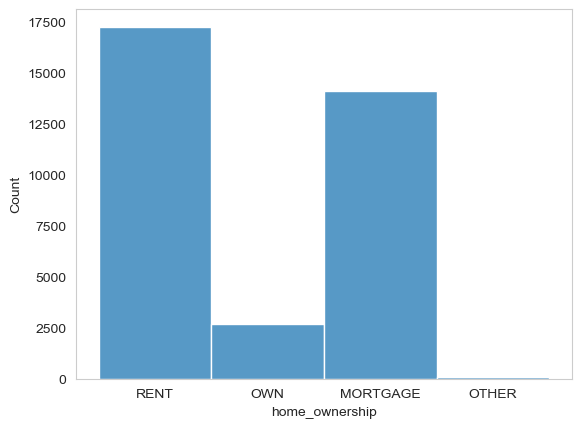

In [112]:
sns.color_palette("colorblind")
sns.histplot(loan_df.home_ownership)



### Defining a Function for Analyzing the Columns with 'Charged Off', 'Fully Paid' and 'Both Charged Off and 'Fully Paid'

In [113]:
def plot_hist(df_nm,col_nm,status_flag):
    df_nm.sort_values(col_nm, ascending = False, inplace = True)
    if status_flag != 3:
        df_nm = df_nm[df_nm.loan_status_flag == status_flag]
        
    
    if col_nm in ['purpose','sub_grade']: 
        plt.figure(figsize = (25,5))
    else:       
        plt.figure(figsize = (8,4))
    
    plt.ylabel('Frequency')
    
    sns.histplot(df_nm[col_nm])
    if(status_flag == 1 ):
        
        plt.xlabel(col_nm +' fully paid')
    elif (status_flag == 0 ) :
        plt.xlabel(col_nm +' charged off') 
    elif (status_flag == 3):
        plt.xlabel(col_nm)

# Home ownership

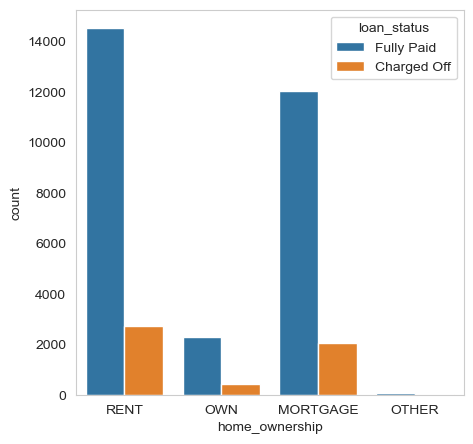

In [114]:
#Distribution of home ownership
plt.figure(figsize = (5,5))
sns.countplot(x= loan_df['home_ownership'], hue = loan_df['loan_status'])
plt.show()

In [115]:
#creating function to compute charged off loan count% for any feature/variable
def loan_status_percent(df1,col1, col2):
    
    df_ls_v1 = df1.groupby([col1,col2]).agg(loan_count = (col2,'count'))
    df_ls_v1.reset_index(inplace=True)
    df_ls_v2 = df_ls_v1.groupby([col1]).agg(total_loan_count = ('loan_count','sum'))
    df_ls_v2.reset_index(inplace=True)

    df_ls_v_merged = pd.merge(df_ls_v1,df_ls_v2,on=[col1],how='inner')
    df_ls_v_merged['loan_count_%'] = (df_ls_v_merged['loan_count']/df_ls_v_merged['total_loan_count'])*100
    df_ls_v_merged1=df_ls_v_merged[df_ls_v_merged[col2]=='Charged Off']
    plt.figure(figsize=(10,5))
    sns.barplot(x= df_ls_v_merged1[col1].sort_values(),hue= df_ls_v_merged1[col2] ,y = df_ls_v_merged1['loan_count_%'])
    return df_ls_v_merged

  home_ownership  loan_status  loan_count  total_loan_count  loan_count_%
0       MORTGAGE  Charged Off        2065             14087     14.658905
1       MORTGAGE   Fully Paid       12022             14087     85.341095
2          OTHER  Charged Off          16                93     17.204301
3          OTHER   Fully Paid          77                93     82.795699
4            OWN  Charged Off         420              2696     15.578635
5            OWN   Fully Paid        2276              2696     84.421365
6           RENT  Charged Off        2726             17254     15.799235
7           RENT   Fully Paid       14528             17254     84.200765


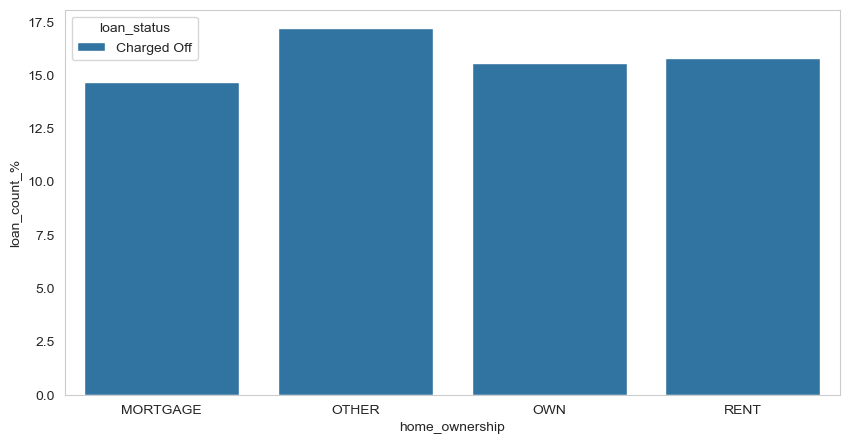

In [116]:
print(loan_status_percent(loan_df,'home_ownership','loan_status'))

In the above function - charts and tables - the charged off loan count% signifies the ratio of charged off loans to the total no of loans associated with that particular category. For ex - if there are 100 loans assigned to mortgage ownership category out of which 15 loans were charged off this would indicate that the chargd off loan count% is 15% for the mortgage ownership category

Inference: While it is observed that for loans under Rent and Mortgage ownership type, the count of loans is higher however from the above table since there is not much difference between the charge-off loan-count% between catgories, it is observed that the home ownership type does not have much relevance or impact on whether a borrower is likely to default and therefore we believe this variable is not useful to the analysis from a univariate standpoint 

# Purpose

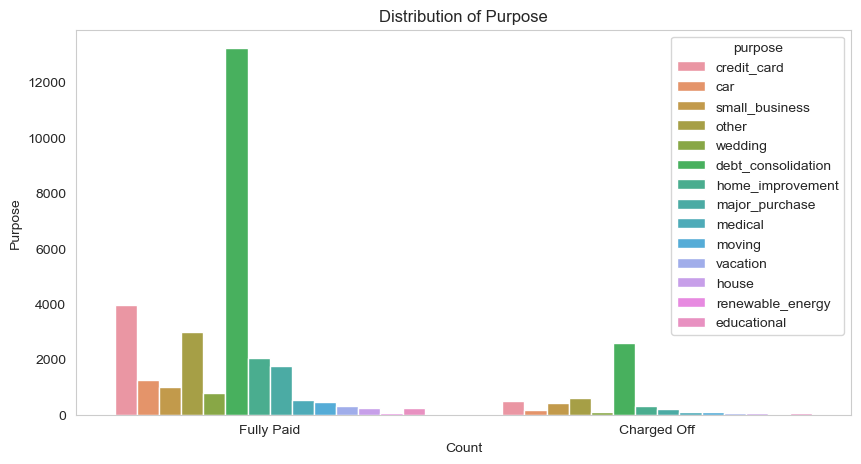

In [117]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(hue= loan_df['purpose'], x = loan_df['loan_status'])
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()


In [118]:
df_ls_p1 = loan_df.groupby(['purpose','loan_status']).agg(loan_count = ('loan_status','count'))
df_ls_p1.reset_index(inplace=True)
df_ls_p2 = df_ls_p1.groupby(['purpose']).agg(total_loan_count = ('loan_count','sum'))
df_ls_p2.reset_index(inplace=True)

df_ls_p_merged = pd.merge(df_ls_p1,df_ls_p2,on=['purpose'],how='inner')
df_ls_p_merged['loan_count_%'] = (df_ls_p_merged['loan_count']/df_ls_p_merged['total_loan_count'])*100
df_ls_p_merged.head(20)

,purpose,loan_status,loan_count,total_loan_count,loan_count_%
0,car,Charged Off,158,1426,11.079944
1,car,Fully Paid,1268,1426,88.920056
2,credit_card,Charged Off,499,4442,11.233679
3,credit_card,Fully Paid,3943,4442,88.766321
4,debt_consolidation,Charged Off,2570,15799,16.266852
5,debt_consolidation,Fully Paid,13229,15799,83.733148
6,educational,Charged Off,54,307,17.589577
7,educational,Fully Paid,253,307,82.410423
8,home_improvement,Charged Off,311,2360,13.177966
9,home_improvement,Fully Paid,2049,2360,86.822034


Inference: It is observed that around 49% of the charge off loans have orginated under the purpose of debt_consolidation along with that we also observe higher charge off percentage (16.3% of charge off loans) which indicates that 'debt consolidation' associated loans have a higher likeliness to default

# Verification Status

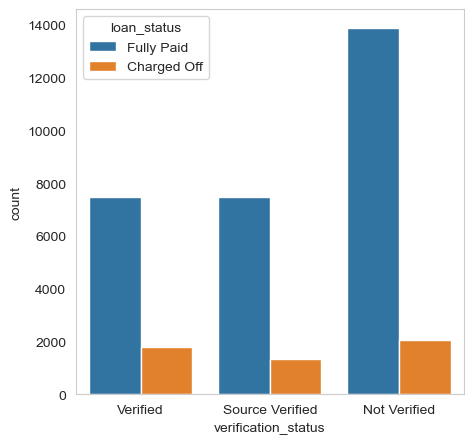

In [119]:
# Distribution of verification_status
plt.figure(figsize = (5,5))
sns.countplot(x= loan_df['verification_status'], hue = loan_df['loan_status'])
plt.show()


  verification_status  loan_status  loan_count  total_loan_count  loan_count_%
0        Not Verified  Charged Off        2076             15987     12.985551
1        Not Verified   Fully Paid       13911             15987     87.014449
2     Source Verified  Charged Off        1343              8839     15.194026
3     Source Verified   Fully Paid        7496              8839     84.805974
4            Verified  Charged Off        1808              9304     19.432502
5            Verified   Fully Paid        7496              9304     80.567498


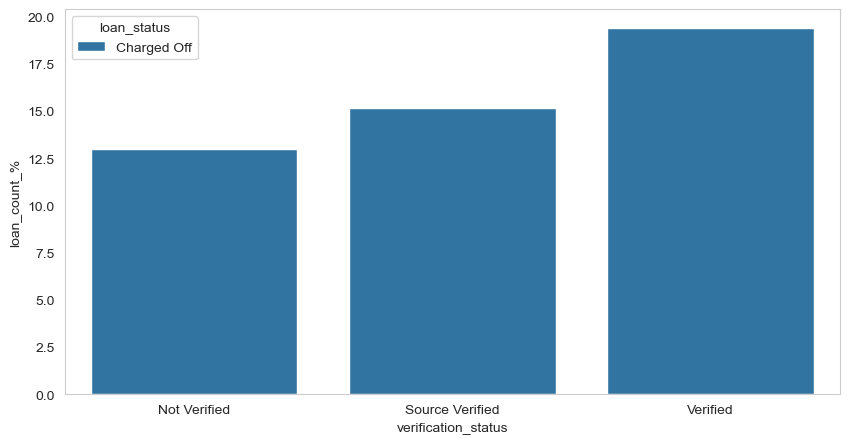

In [120]:
print(loan_status_percent(loan_df,'verification_status','loan_status'))

Inference: Based on the above observation - charts and tables, it can be noted that even if the verified borrowers by LC are less than the unverified (9300 vs 16000 approx) however the verified borrower category has displayed larger charge off percentage (19.5%) which is an indication that this category (verified by LC) is more likely to default based on the dataset provided.

#PS - While this insight might not align with a business logic this also might be an indication that borrowers verified by LC do not come under much scrutiny which is why there is a chance that these borrowers might pass under the radar and thereby become more highly likely to default

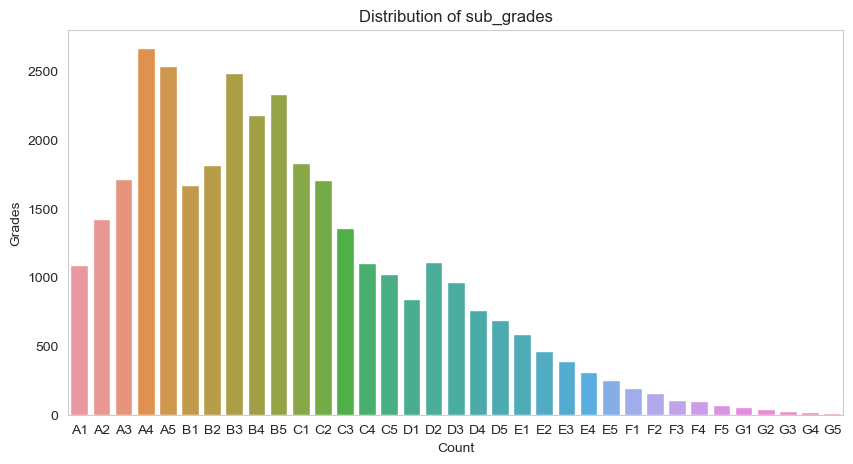

In [121]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(x=loan_df['sub_grade'].sort_values(), data=loan_df)
plt.xlabel('Count')
plt.ylabel('Grades')
plt.title('Distribution of sub_grades',fontsize=12)
plt.show()


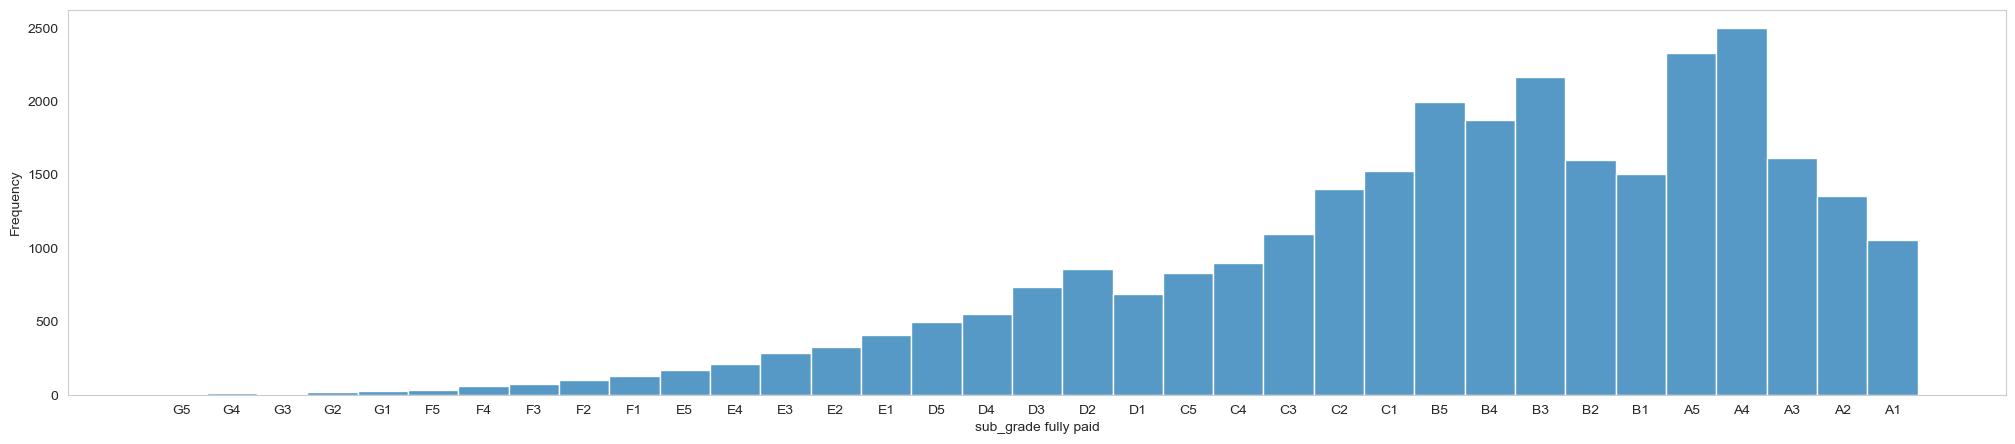

In [122]:
#fully paid
plot_hist(loan_df,'sub_grade',1)

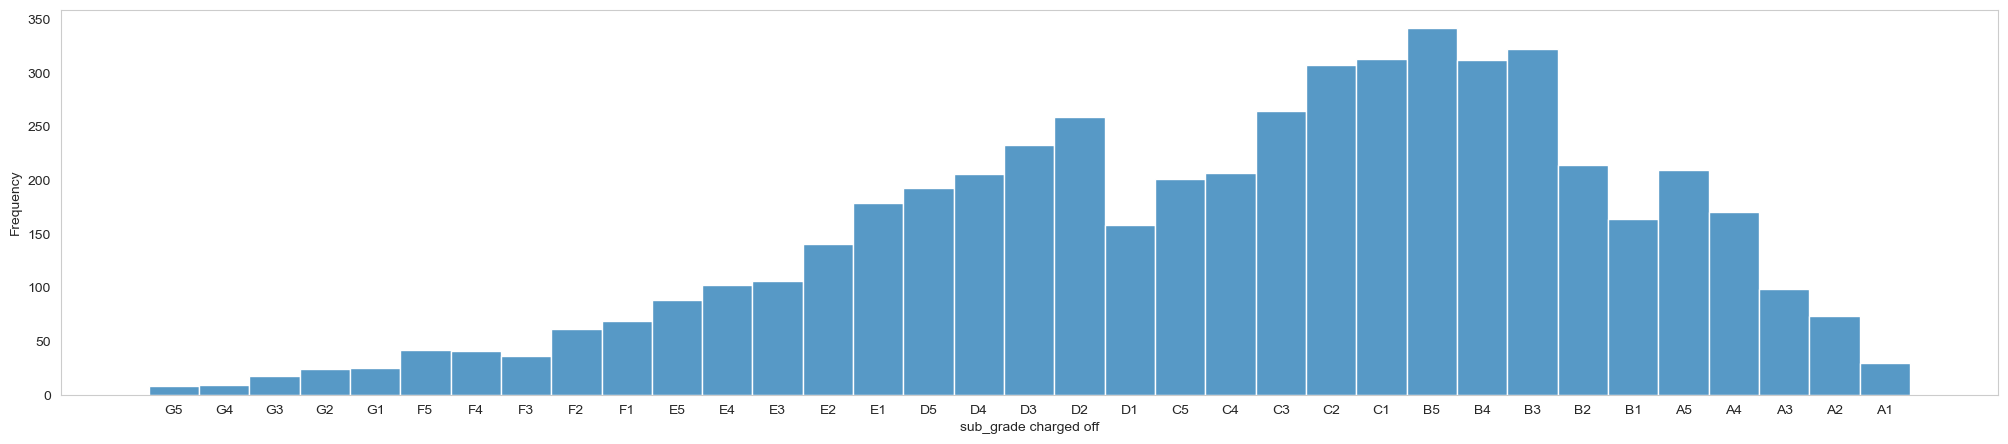

In [123]:
#charged off loans
plot_hist(loan_df,'sub_grade',0)

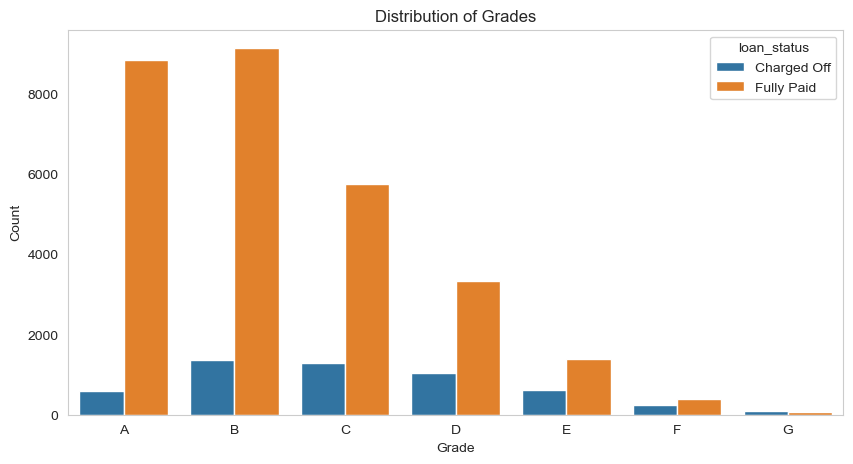

In [124]:
# Distribution of grades
plt.figure(figsize=(10,5))
sns.countplot(x= loan_df['grade'].sort_values(),hue = loan_df['loan_status'])
plt.ylabel('Count')
plt.xlabel('Grade')
plt.title('Distribution of Grades',fontsize=12)
plt.show()

   grade  loan_status  loan_count  total_loan_count  loan_count_%
0      A  Charged Off         582              9430      6.171792
1      A   Fully Paid        8848              9430     93.828208
2      B  Charged Off        1354             10489     12.908762
3      B   Fully Paid        9135             10489     87.091238
4      C  Charged Off        1294              7030     18.406828
5      C   Fully Paid        5736              7030     81.593172
6      D  Charged Off        1049              4374     23.982625
7      D   Fully Paid        3325              4374     76.017375
8      E  Charged Off         616              2013     30.601093
9      E   Fully Paid        1397              2013     69.398907
10     F  Charged Off         249               639     38.967136
11     F   Fully Paid         390               639     61.032864
12     G  Charged Off          83               155     53.548387
13     G   Fully Paid          72               155     46.451613


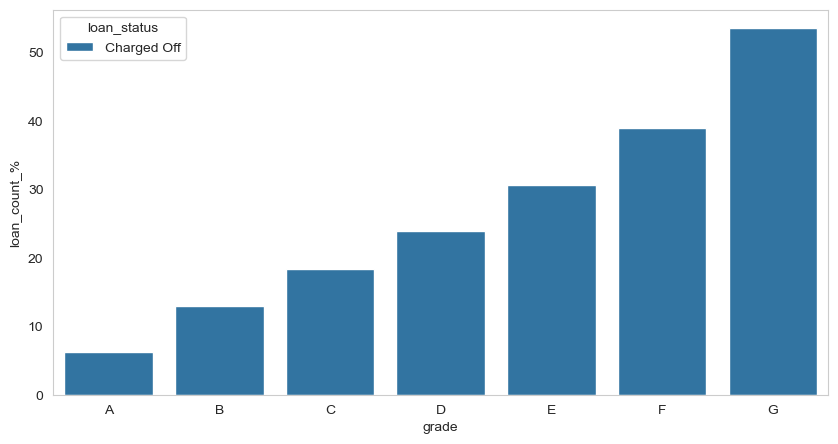

In [125]:
print(loan_status_percent(loan_df,'grade','loan_status'))

Observation on 'Grade' categories: Most of the Charged-off are observed in 'B' and 'C' Grades, almost 50% of the Chargeoff Population, but it is also observed that number of loans in lower sub-grades are more than its higher sub-grades, except for Grade C, where it is a opposite trend.

Inference: It can be inferred based on the observation above that loans belonging to sub prime grades i.e. as we move from A,B towards G we observe that the charge off percentage increases which indicates the the loans with sub-prime grades are much more riskier and much more likely to default

# Employment Length

In [126]:
#Employement Length
loan_df.emp_length.unique()

array([10.,  4.,  2.,  5.,  0.,  3.,  7.,  6.,  1.,  8.,  9.])

In [127]:
print(loan_df['emp_length'].describe())


count    34130.000000
mean         4.955318
std          3.583215
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


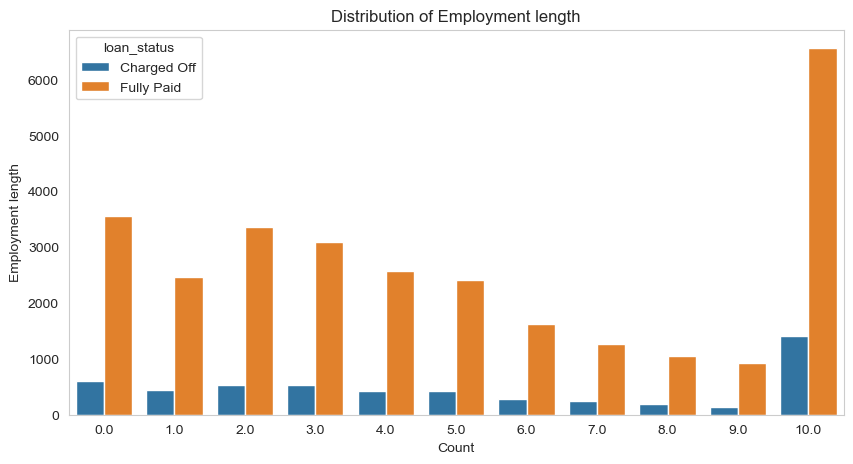

In [128]:
# Distribution of employment length
plt.figure(figsize=(10,5))
sns.countplot(x= loan_df['emp_length'].sort_values(),hue = loan_df['loan_status'])
plt.xlabel('Count')
plt.ylabel('Employment length')
plt.title('Distribution of Employment length',fontsize=12)
plt.show()

    emp_length  loan_status  loan_count  total_loan_count  loan_count_%
0          0.0  Charged Off         599              4148     14.440694
1          0.0   Fully Paid        3549              4148     85.559306
2          1.0  Charged Off         441              2909     15.159849
3          1.0   Fully Paid        2468              2909     84.840151
4          2.0  Charged Off         537              3894     13.790447
5          2.0   Fully Paid        3357              3894     86.209553
6          3.0  Charged Off         526              3622     14.522363
7          3.0   Fully Paid        3096              3622     85.477637
8          4.0  Charged Off         428              3008     14.228723
9          4.0   Fully Paid        2580              3008     85.771277
10         5.0  Charged Off         425              2843     14.948998
11         5.0   Fully Paid        2418              2843     85.051002
12         6.0  Charged Off         284              1915     14

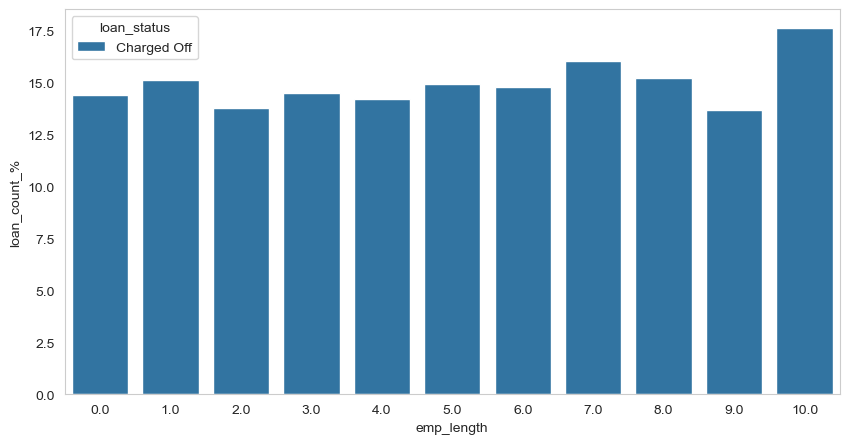

In [129]:
print(loan_status_percent(loan_df,'emp_length','loan_status'))

Observation and Inference: From the above charts and tables it is observed that borrowers with employment length >10yrs have a higher no of loans(fully paid and charge off loans) as well as we notice the charge off% to be marginally higher for borrowers with employment length >10yrs. Based on the above graph we can conclude that employment length can not be considered as a primary indicator given it is unable to provide any concrete evidence to suggest the influence of this feature towards defaulting.

# annual income

In [130]:
loan_df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,55176.622518,25756.440032,4080.0,36000.0,50004.0,70000.0,140004.0
Fully Paid,28903.0,59433.472416,26873.633561,4000.0,39996.0,55000.0,75000.0,140004.0


In [131]:
loan_df['annual_inc'].describe()

count     34130.000000
mean      58781.537039
std       26749.164946
min        4000.000000
25%       39000.000000
50%       54300.000000
75%       75000.000000
max      140004.000000
Name: annual_inc, dtype: float64

In [132]:
# categorizing the 'annual income' to various categories/ bins
def annual_inc_cat(x):
    x = int(x)
    if x < 25000:
        return '0-25000'
    elif x>=25000 and x<50000:
        return '25000-50000'
    elif x>=50000 and x<75000:
        return '50000-75000'
    elif x>=75000 and x<100000:
        return '75000-100000'
    else:
        return 'more than 100,000'
    


In [133]:
loan_df['annual_inc_cat'] = loan_df['annual_inc'].apply(lambda x : annual_inc_cat(x))
loan_df[['annual_inc','annual_inc_cat']].head()

,annual_inc,annual_inc_cat
36112,94000.0,75000-100000
16227,53004.0,50000-75000
22085,62400.0,50000-75000
23661,108000.0,"more than 100,000"
5964,80000.0,75000-100000


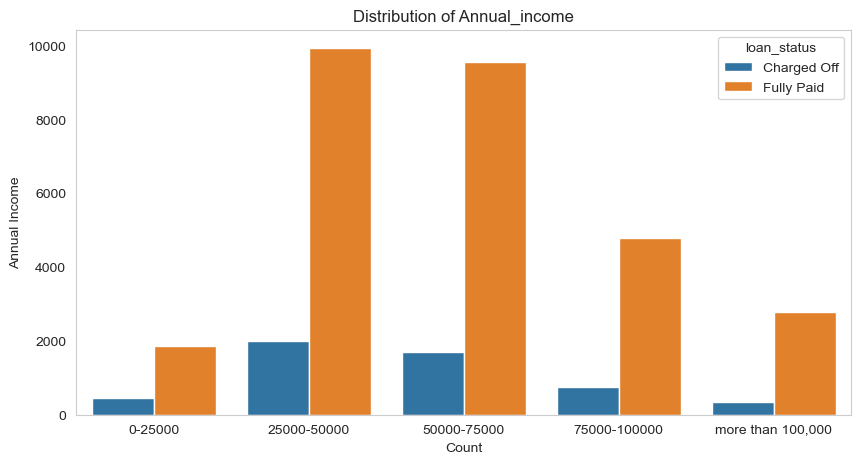

In [134]:
# Distribution of Annual income
plt.figure(figsize=(10,5))
sns.countplot(x= loan_df['annual_inc_cat'].sort_values(),hue = loan_df['loan_status'])
plt.xlabel('Count')
plt.ylabel('Annual Income')
plt.title('Distribution of Annual_income',fontsize=12)
plt.show()

      annual_inc_cat  loan_status  loan_count  total_loan_count  loan_count_%
0            0-25000  Charged Off         450              2303     19.539731
1            0-25000   Fully Paid        1853              2303     80.460269
2        25000-50000  Charged Off        1989             11921     16.684842
3        25000-50000   Fully Paid        9932             11921     83.315158
4        50000-75000  Charged Off        1694             11242     15.068493
5        50000-75000   Fully Paid        9548             11242     84.931507
6       75000-100000  Charged Off         742              5527     13.425005
7       75000-100000   Fully Paid        4785              5527     86.574995
8  more than 100,000  Charged Off         352              3137     11.220912
9  more than 100,000   Fully Paid        2785              3137     88.779088


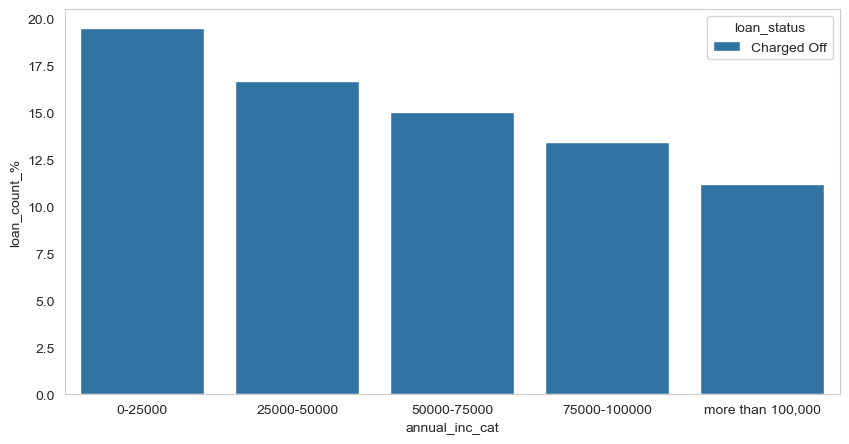

In [135]:
print(loan_status_percent(loan_df,'annual_inc_cat','loan_status'))

<Axes: xlabel='loan_status', ylabel='annual_inc'>

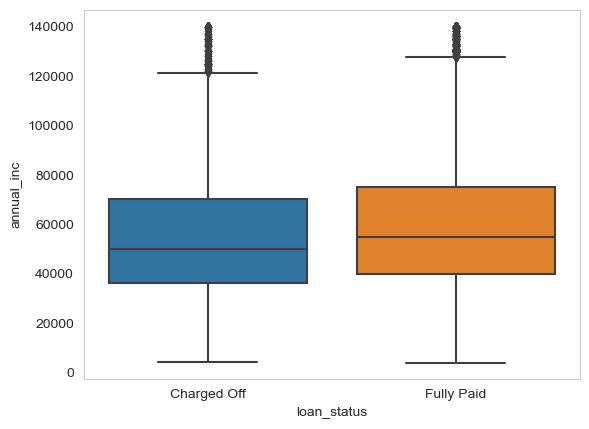

In [136]:
sns.boxplot(data = loan_df, x = loan_df['loan_status'] ,y = loan_df['annual_inc'])

In [137]:
loan_df.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,4.692475,0.214861,3.61066,4.556303,4.699005,4.845098,5.14614
Fully Paid,28903.0,4.727168,0.209421,3.60206,4.602017,4.740363,4.875061,5.14614


<Axes: xlabel='loan_status', ylabel='log_annual_inc'>

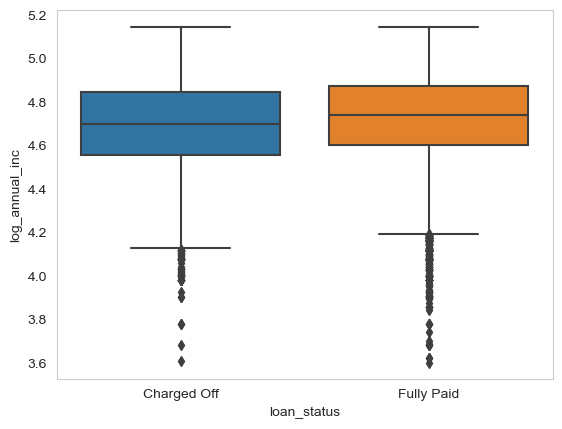

In [138]:
sns.boxplot(data = loan_df, x = loan_df['loan_status'] ,y = loan_df['log_annual_inc'])

Observation: Based on observations noted below we can infer that higher income accounts are less likely to Default:
1. Charged Off accounts have less spread of Income when compared to Fully Paid accounts
2. The Charge off% decreased with increasing income groups


# Interest rate

In [139]:
loan_df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,13.658018,3.575602,5.42,11.14,13.49,16.07,24.40
Fully Paid,28903.0,11.321984,3.437661,5.42,8.00,11.14,13.61,23.91


<Axes: xlabel='loan_status', ylabel='int_rate'>

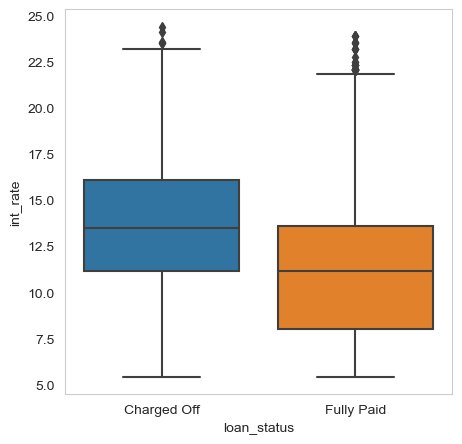

In [140]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['int_rate'] )

In [141]:
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

Text(0.5, 0, 'Interest Rate')

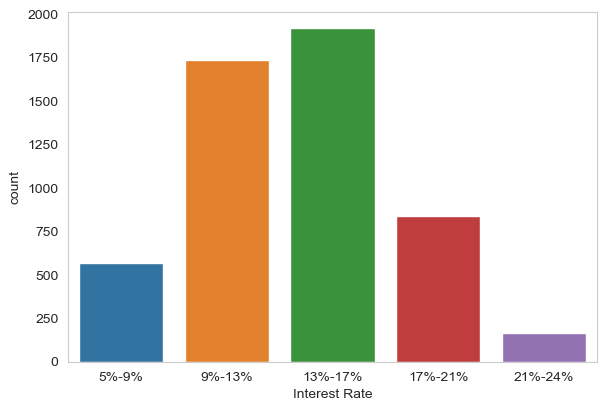

In [142]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

  int_rate_groups  loan_status  loan_count  total_loan_count  loan_count_%
0           5%-9%  Charged Off         568              9229      6.154513
1           5%-9%   Fully Paid        8661              9229     93.845487
2          9%-13%  Charged Off        1738             12762     13.618555
3          9%-13%   Fully Paid       11024             12762     86.381445
4         13%-17%  Charged Off        1919              9409     20.395366
5         13%-17%   Fully Paid        7490              9409     79.604634
6         17%-21%  Charged Off         838              2439     34.358344
7         17%-21%   Fully Paid        1601              2439     65.641656
8         21%-24%  Charged Off         164               291     56.357388
9         21%-24%   Fully Paid         127               291     43.642612


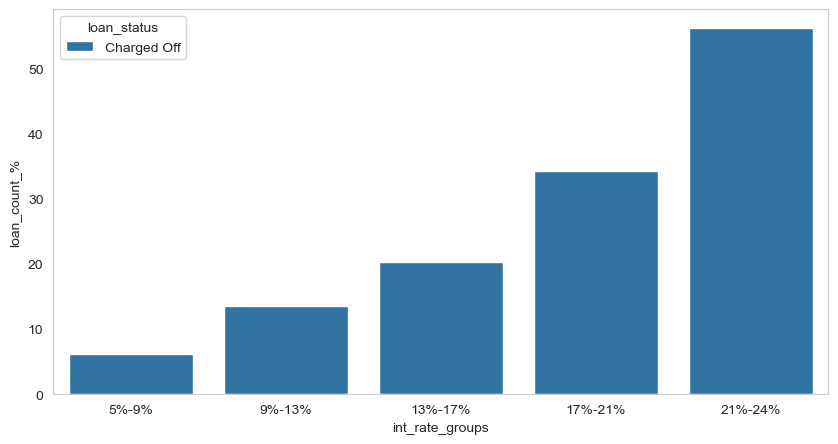

In [143]:
print(loan_status_percent(loan_df,'int_rate_groups','loan_status'))

Observation: 'Charged Off' accounts are charged higher Interest Rates when compared to 'Fully Paid' accounts, almost by 3%. However since this information regarding interest rate is not available before a borrower is onboarded therefore this variable will not add any value to the overall analysis which is why we can ignore this feature in the context of univariate analysis.

# installment

In [144]:
loan_df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,312.345653,190.412144,22.79,165.06,278.65,419.840,892.30
Fully Paid,28903.0,277.739216,158.183388,15.69,156.48,250.49,371.585,888.14


<Axes: xlabel='loan_status', ylabel='installment'>

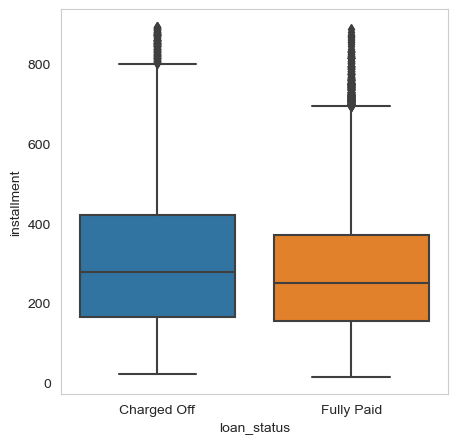

In [145]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['installment'] )

Observation: Installments are marginally higher for Charged Off Accounts when compared to Fully Paid accounts, which is intuitive as Interest rates are also higher for Charged Off accounts than Fully Paid accounts. However this feature as a standalone variable does not add any value to the overall analysis and will not help predict whether a borrower is likely to default or not since the installment is computed post approval.

# dti

In [146]:
# dti
loan_df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,14.076164,6.602146,0.0,9.15,14.36,19.395,29.85
Fully Paid,28903.0,13.213665,6.689126,0.0,8.03,13.27,18.510,29.99


<Axes: xlabel='loan_status', ylabel='dti'>

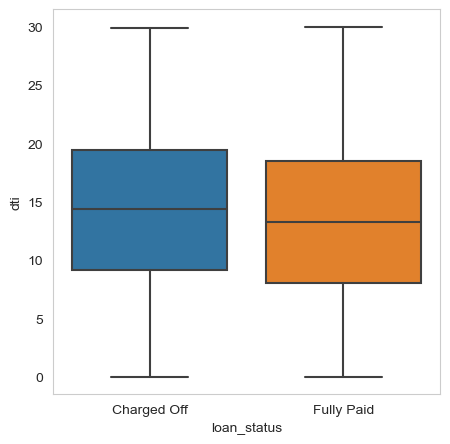

In [147]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['dti'] )

In [148]:
loan_df['dti_groups'] = pd.cut(loan_df['dti'],bins = 5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

Text(0.5, 0, 'DTI')

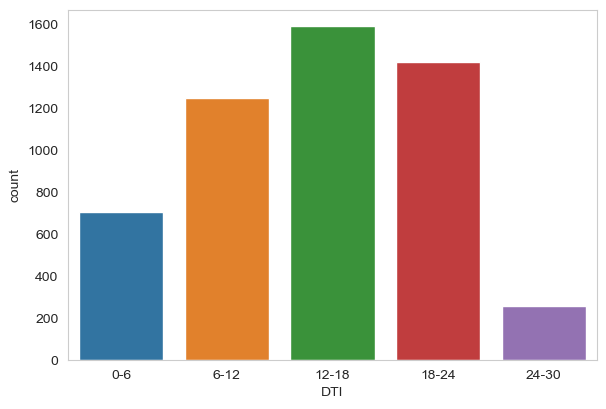

In [149]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='dti_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('DTI')

  dti_groups  loan_status  loan_count  total_loan_count  loan_count_%
0        0-6  Charged Off         706              5582     12.647796
1        0-6   Fully Paid        4876              5582     87.352204
2       6-12  Charged Off        1251              8978     13.934061
3       6-12   Fully Paid        7727              8978     86.065939
4      12-18  Charged Off        1591             10010     15.894106
5      12-18   Fully Paid        8419             10010     84.105894
6      18-24  Charged Off        1423              8021     17.740930
7      18-24   Fully Paid        6598              8021     82.259070
8      24-30  Charged Off         256              1539     16.634178
9      24-30   Fully Paid        1283              1539     83.365822


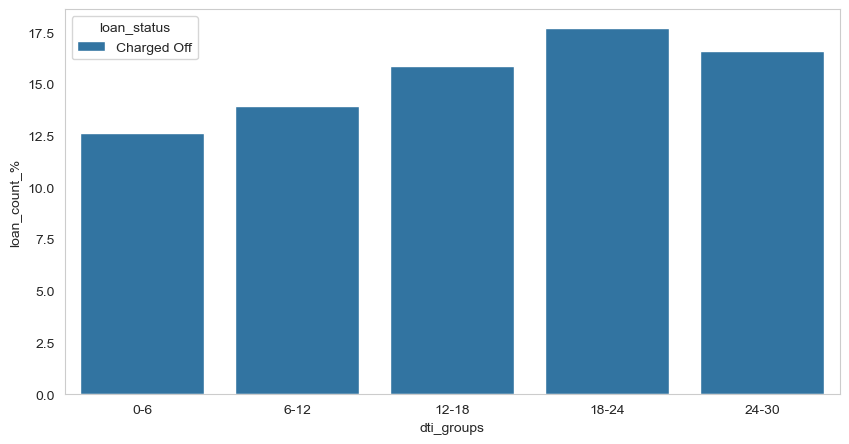

In [150]:
print(loan_status_percent(loan_df,'dti_groups','loan_status'))

Observation: Based on observations from above plots it can be noted that the borrowers with higher debt to income ratios are likely to default more. These are based on the below noted observations:
1. Charged Off loans have marginally higher dti when compared to Fully Paid loans as per the box plot
2. As per the above bar plots and tables it can be noted the charged off percentages increased with increase in dti values since charge off% is higher for dti groups 12-18, 18-24, 24-30

# Earliest credit line

In [151]:
loan_df.groupby('loan_status')['earliest_cr_line_yr'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,1997.184427,6.722483,1962.0,1994.0,1998.0,2002.0,2008.0
Fully Paid,28903.0,1996.985399,6.729652,1946.0,1994.0,1998.0,2002.0,2008.0


In [152]:
# categorizing the 'earliest credit line'
def year_cat(x):
    if x < 1980:
        return 'pre_80s'
    elif x>=1980 and x<1990:
        return '80s'
    elif x>=1990 and x<2000:
        return '90s'
    else:
        return 'in_2000s'
    
loan_df['earliest_cr_line_yr_cat'] = loan_df['earliest_cr_line_yr'].apply(lambda x : year_cat(x))
loan_df['earliest_cr_line_yr_cat'].head()

36112         90s
16227    in_2000s
22085         90s
23661         90s
5964     in_2000s
Name: earliest_cr_line_yr_cat, dtype: object

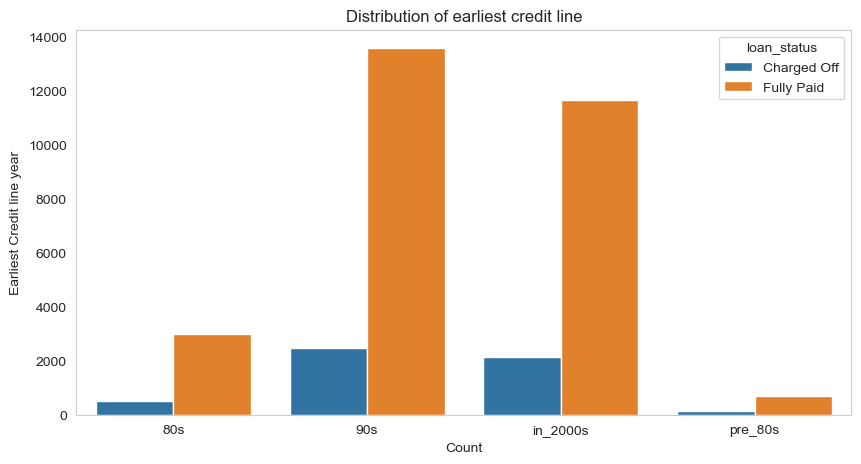

In [153]:

# Distribution of earliest credit line
plt.figure(figsize=(10,5))
sns.countplot(x= loan_df['earliest_cr_line_yr_cat'].sort_values(),hue = loan_df['loan_status'])
plt.xlabel('Count')
plt.ylabel('Earliest Credit line year')
plt.title('Distribution of earliest credit line',fontsize=12)
plt.show()

  earliest_cr_line_yr_cat  loan_status  loan_count  total_loan_count  \
0                     80s  Charged Off         519              3499   
1                     80s   Fully Paid        2980              3499   
2                     90s  Charged Off        2453             16032   
3                     90s   Fully Paid       13579             16032   
4                in_2000s  Charged Off        2135             13791   
5                in_2000s   Fully Paid       11656             13791   
6                 pre_80s  Charged Off         120               808   
7                 pre_80s   Fully Paid         688               808   

   loan_count_%  
0     14.832809  
1     85.167191  
2     15.300649  
3     84.699351  
4     15.481111  
5     84.518889  
6     14.851485  
7     85.148515  


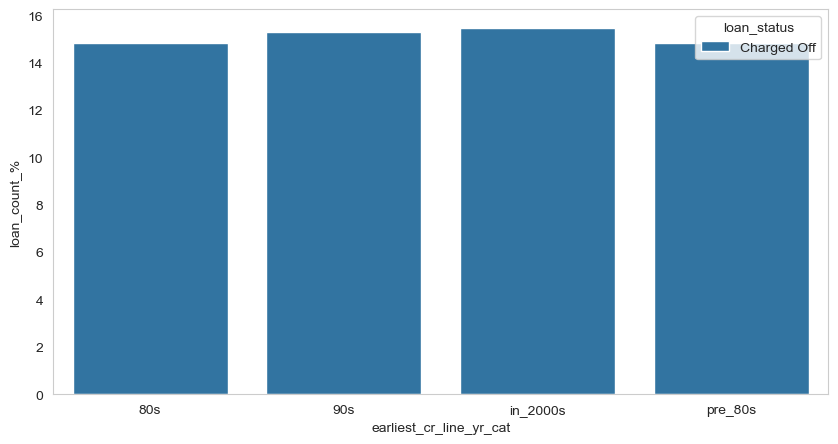

In [154]:
print(loan_status_percent(loan_df,'earliest_cr_line_yr_cat','loan_status'))

Based on the above data, the insights are inconclusive since the earliest credit line does not impact the no of charged off loans as not much difference is observed for the charged off loan count% in the above categories and therefore we do not consider this feature to be beneficial to the analysis in the context of univariate exercise

# delinq_2yrs

In [155]:
loan_df.groupby('loan_status')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,0.169696,0.534762,0.0,0.0,0.0,0.0,8.0
Fully Paid,28903.0,0.142200,0.487316,0.0,0.0,0.0,0.0,11.0


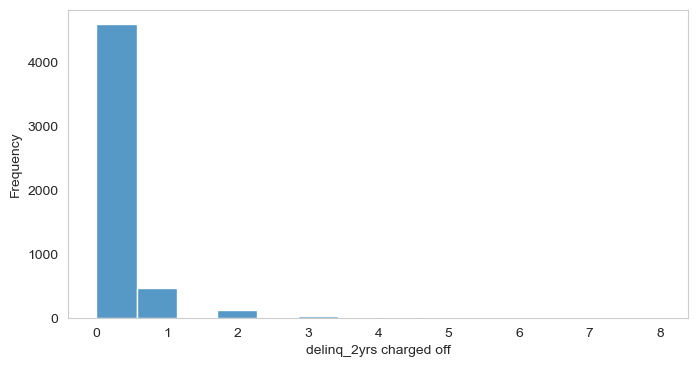

In [156]:
plot_hist(loan_df,'delinq_2yrs',0)

currently we cannot conclude anything, but delinquency may be used in further, while carrying out Bivariate analysis

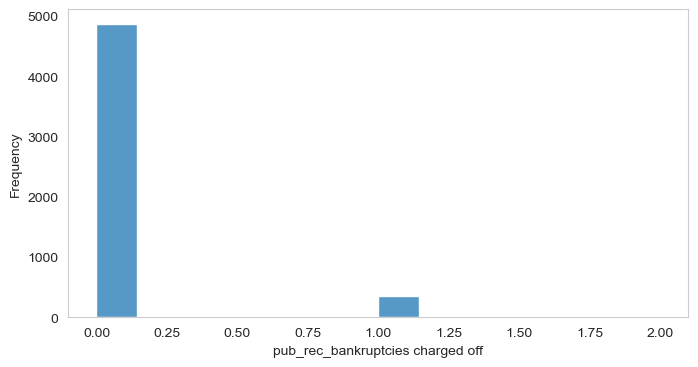

In [157]:
#Charged Off
plot_hist(loan_df, 'pub_rec_bankruptcies', 0)

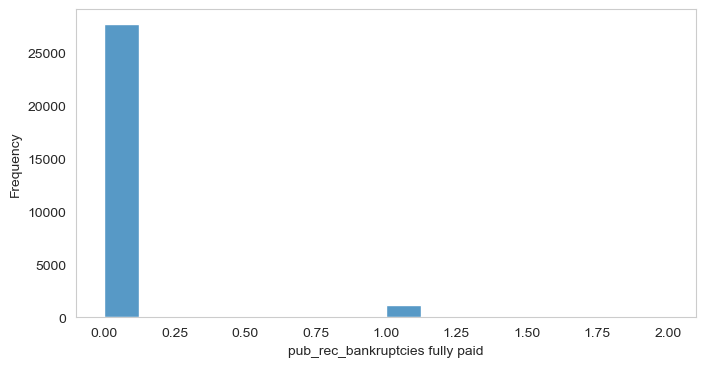

In [158]:
# Fully Paid
plot_hist(loan_df, 'pub_rec_bankruptcies', 1)

It is observed that Charged off loans are not necesarily reported in Public records as Bankrupt.

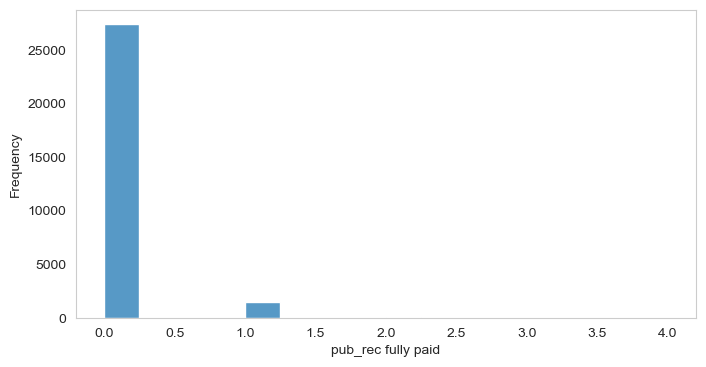

In [159]:
#Fully paid
plot_hist(loan_df, 'pub_rec', 1)

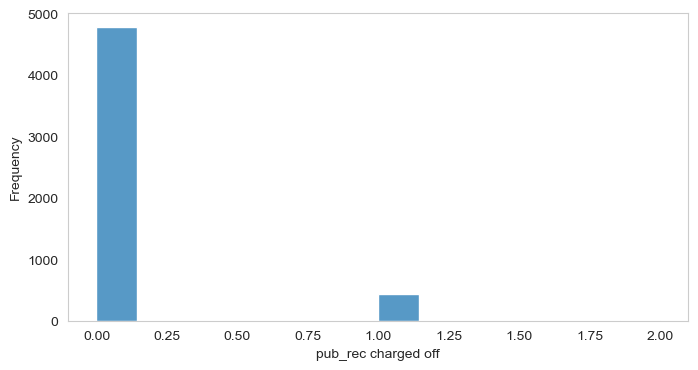

In [160]:
#Charged Off
plot_hist(loan_df, 'pub_rec', 0)

It is observed that Charged off loans are reported in Public Deregatory records twice the numbers in Fully Paid loans, which may be a driving factor for further analysis.

# revol_util

In [161]:
loan_df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,54.969212,27.985365,0.0,33.65,57.7,78.3,99.9
Fully Paid,28903.0,46.915090,28.229265,0.0,23.30,46.6,70.1,99.9


<Axes: xlabel='loan_status', ylabel='revol_util'>

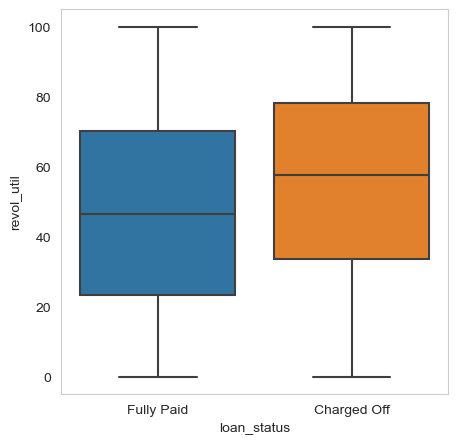

In [162]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['revol_util'] )

From the above plot we see that charged off loans have relatively higher revol_util rate

In [163]:
loan_df['revol_util_groups'] = pd.cut(loan_df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])

Text(0.5, 0, 'Revolving utilization Rate')

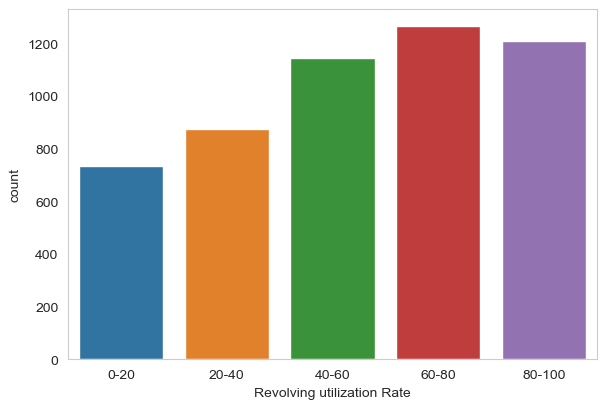

In [164]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='revol_util_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Revolving utilization Rate')

  revol_util_groups  loan_status  loan_count  total_loan_count  loan_count_%
0              0-20  Charged Off         734              6979     10.517266
1              0-20   Fully Paid        6245              6979     89.482734
2             20-40  Charged Off         876              7014     12.489307
3             20-40   Fully Paid        6138              7014     87.510693
4             40-60  Charged Off        1143              7416     15.412621
5             40-60   Fully Paid        6273              7416     84.587379
6             60-80  Charged Off        1266              6961     18.187042
7             60-80   Fully Paid        5695              6961     81.812958
8            80-100  Charged Off        1208              5760     20.972222
9            80-100   Fully Paid        4552              5760     79.027778


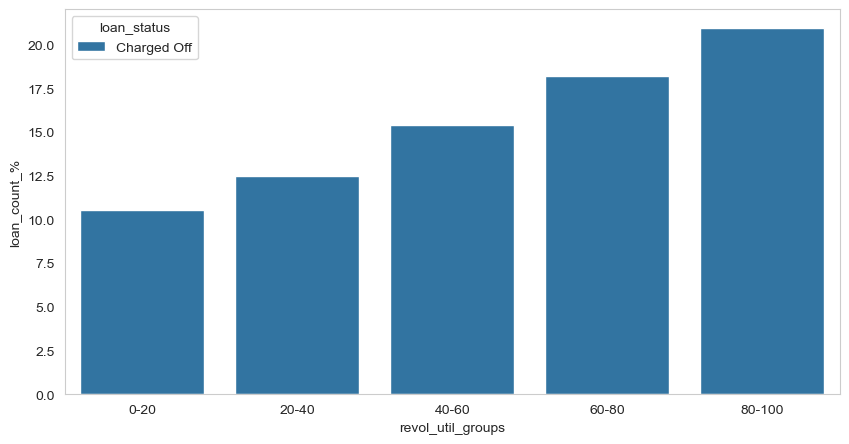

In [165]:
print(loan_status_percent(loan_df,'revol_util_groups','loan_status'))

Inference: From the above plots and tables it is evident that the borrowers associated with higher revolving utilization rate are more likely to default and are riskier given that the charge-off loan-count% increased with the increase in revol-util rates. This is a decent indicator for identifying loans that are likely to default.

# revol_bal

In [166]:
loan_df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,11720.402143,11056.989255,0.0,3819.0,8682.0,16149.5,69715.0
Fully Paid,28903.0,10805.128291,10686.093411,0.0,3301.0,7866.0,14718.5,69823.0


<Axes: xlabel='loan_status', ylabel='revol_bal'>

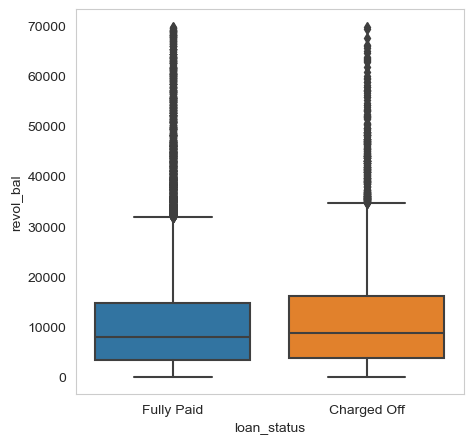

In [167]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['revol_bal'] )

It is observed that median of Revolving Credit Utility in Charged Off loans is marginally higher than Fully Paid thereby is inconclusive in the overall analysis.

# total_acc

In [168]:
# total_acc
loan_df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,20.939353,11.265435,2.0,12.0,19.0,28.0,74.0
Fully Paid,28903.0,21.278864,11.114356,2.0,13.0,20.0,28.0,90.0


In [169]:
loan_df['total_acc_groups'] = pd.cut(loan_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])

Text(0.5, 0, 'Total_accounts')

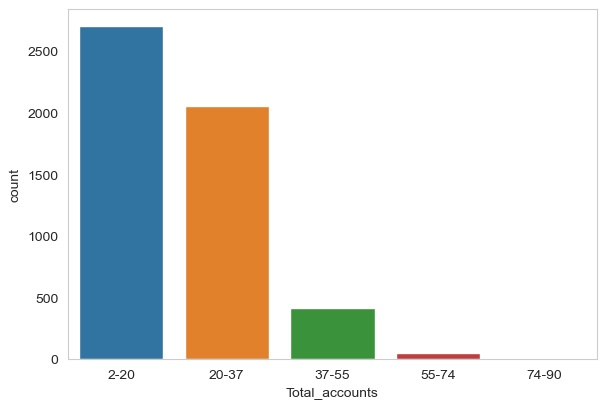

In [170]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='total_acc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Total_accounts')

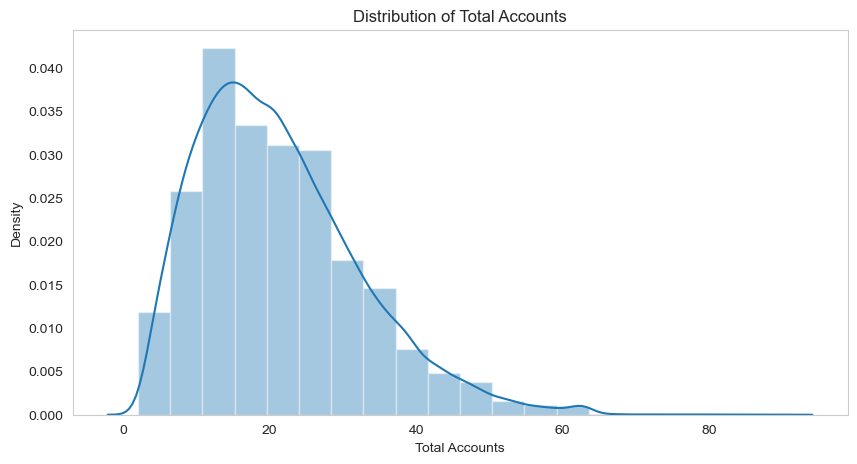

In [171]:
# Distribution of total_accounts

plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_df.total_acc),kde=True,bins=20)
plt.xlabel('Total Accounts')
plt.ylabel('Density')
plt.title('Distribution of Total Accounts')
plt.show()

  total_acc_groups  loan_status  loan_count  total_loan_count  loan_count_%
0             2-20  Charged Off        2703             17021     15.880383
1             2-20   Fully Paid       14318             17021     84.119617
2            20-37  Charged Off        2055             14107     14.567236
3            20-37   Fully Paid       12052             14107     85.432764
4            37-55  Charged Off         418              2663     15.696583
5            37-55   Fully Paid        2245              2663     84.303417
6            55-74  Charged Off          50               328     15.243902
7            55-74   Fully Paid         278               328     84.756098
8            74-90  Charged Off           1                11      9.090909
9            74-90   Fully Paid          10                11     90.909091


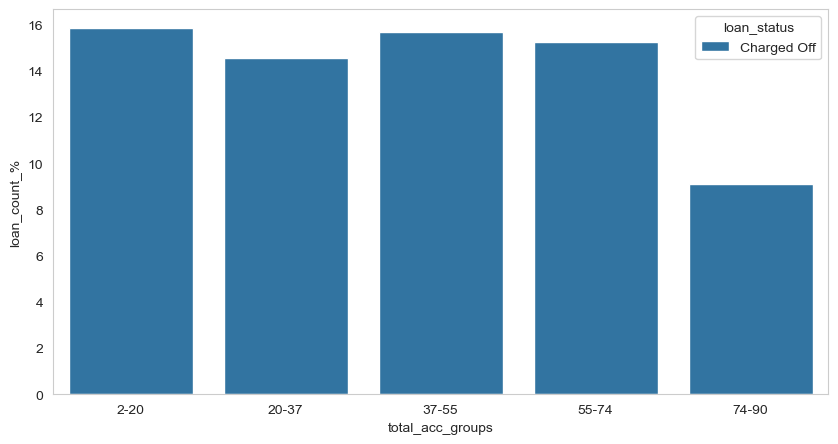

In [172]:
print(loan_status_percent(loan_df,'total_acc_groups','loan_status'))

Based on the above results no such conclusive evidence can be gathered and therefore it can be inferred that on a standalone basis total_acc does not add any value to the analysis.

# addr_state

<Axes: xlabel='addr_state', ylabel='Count'>

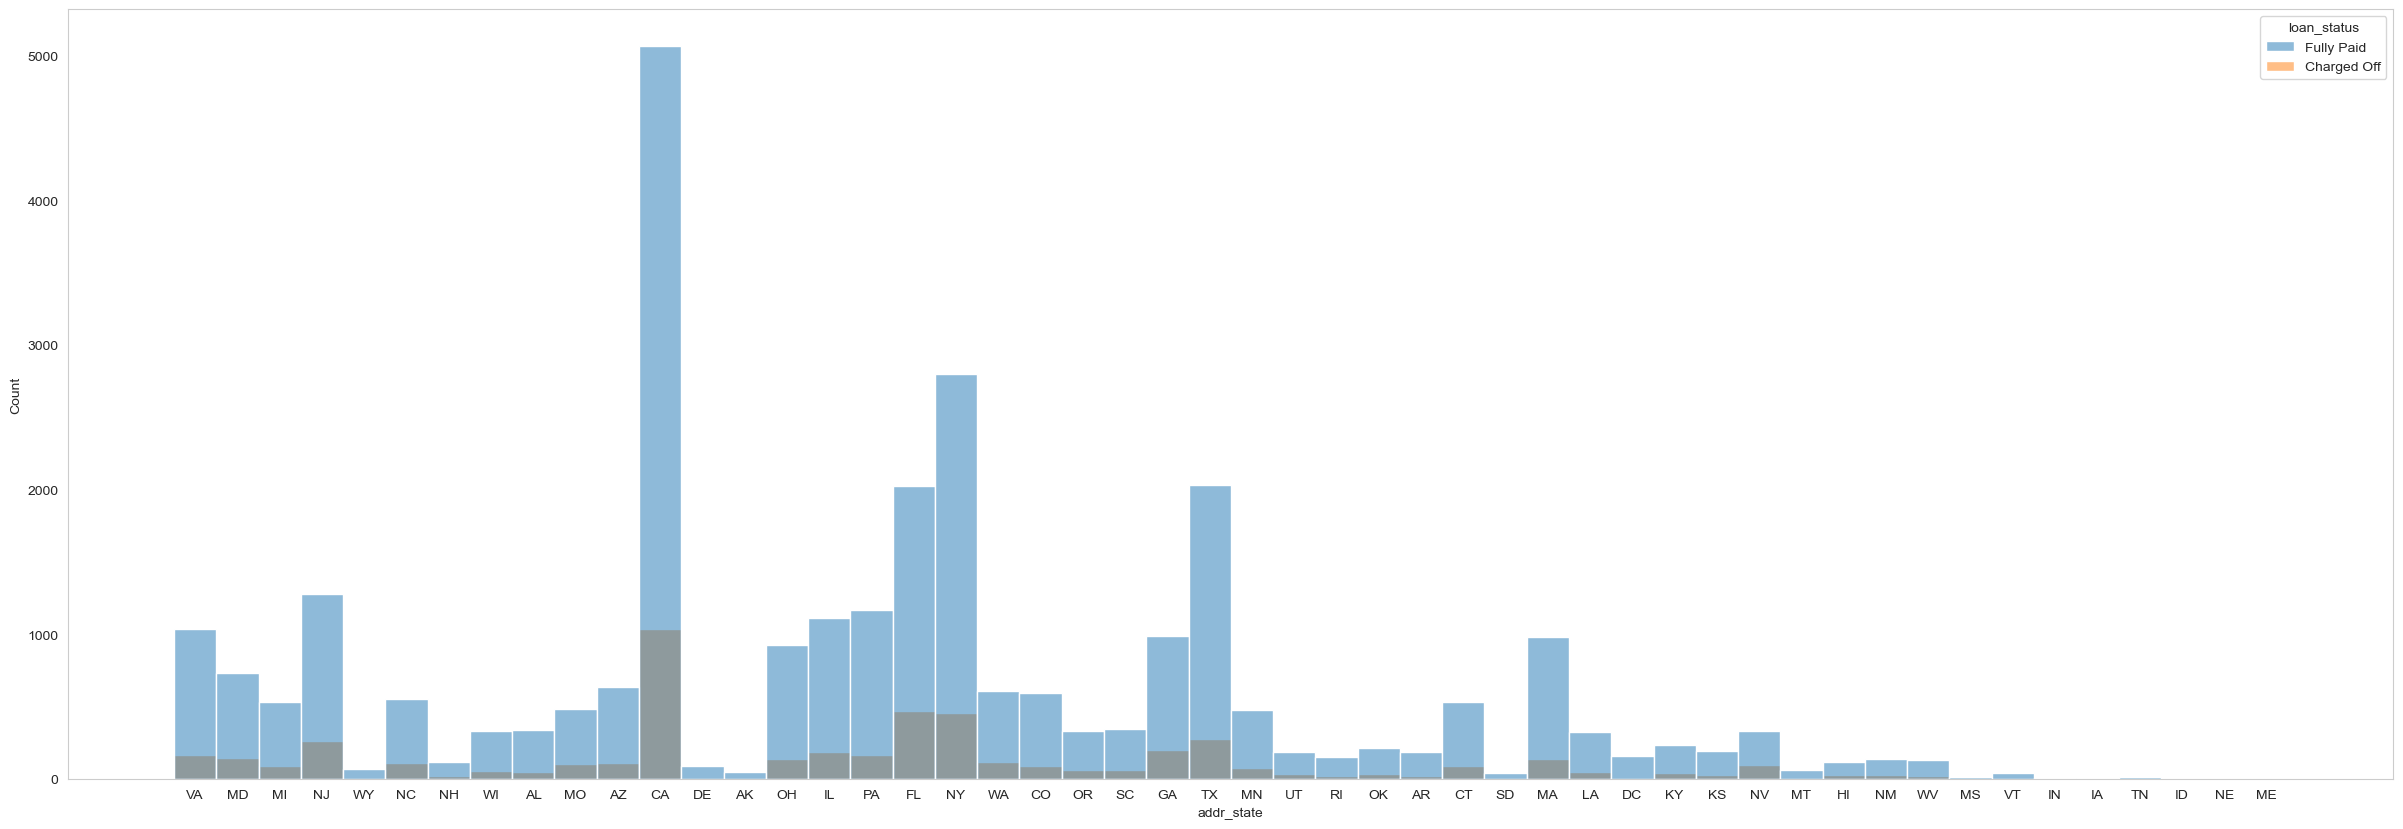

In [173]:
# addr_state
## for Charged-off account
plt.figure(figsize = (30,10))
sns.histplot(x = loan_df['addr_state'], data = loan_df['addr_state'].value_counts(normalize = True), hue = loan_df['loan_status'])

In [174]:
#creating function to compute charged off loan count% for any feature/variable
def loan_status_percent_state(df1,col1, col2):
    
    df_ls_v1 = df1.groupby([col1,col2]).agg(loan_count = (col2,'count'))
    df_ls_v1.reset_index(inplace=True)
    df_ls_v2 = df_ls_v1.groupby([col1]).agg(total_loan_count = ('loan_count','sum'))
    df_ls_v2.reset_index(inplace=True)

    df_ls_v_merged = pd.merge(df_ls_v1,df_ls_v2,on=[col1],how='inner')
    df_ls_v_merged['loan_count_%'] = (df_ls_v_merged['loan_count']/df_ls_v_merged['total_loan_count'])*100
    df_ls_v_merged1=df_ls_v_merged[df_ls_v_merged[col2]=='Charged Off']  
    return df_ls_v_merged1.sort_values(by='loan_count_%', ascending=False).head(15)

In [175]:
#Top 15 states which have highest charged off loans to total loans ratio (charge off loan count%)
print(loan_status_percent_state(loan_df,'addr_state','loan_status'))

   addr_state  loan_status  loan_count  total_loan_count  loan_count_%
53         NE  Charged Off           3                 5     60.000000
61         NV  Charged Off          98               430     22.790698
77         SD  Charged Off          12                58     20.689655
25         ID  Charged Off           1                 5     20.000000
22         HI  Charged Off          28               147     19.047619
18         FL  Charged Off         471              2495     18.877756
0          AK  Charged Off          12                65     18.461538
45         MO  Charged Off         107               594     18.013468
59         NM  Charged Off          30               169     17.751479
69         OR  Charged Off          68               400     17.000000
8          CA  Charged Off        1036              6104     16.972477
57         NJ  Charged Off         262              1546     16.946960
20         GA  Charged Off         200              1193     16.764459
38    

Inference: It is observed that majority of the borrowers are from the large urban cities like california, new york, texas, florida etc which shows propensity of the urban crowd to avail more loans and thereby the propensity to avail loans along with higher expense may lead to higher defaults. 

If we observed the above charge off loan count% table it is noted that among the top 15 cities by charged-off loan-count% - Florida, California and New Jersey showcase higher charge off percentage along with higher no of loans(fully paid and charged off). 

This to some extent indicates that loan approval of these major cities should go through more scrutiny given that the propensity to spend is more in such cities thereby more likely to default.

# funded_amnt_inv

In [176]:
#funded_amnt_inv
loan_df.groupby('loan_status')['funded_amnt_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,10087.740862,6787.196517,0.0,4925.0,8700.0,14500.956265,35000.0
Fully Paid,28903.0,8643.507925,5095.914548,0.0,4800.0,7950.0,12000.000000,25975.0


<Axes: xlabel='loan_status', ylabel='funded_amnt_inv'>

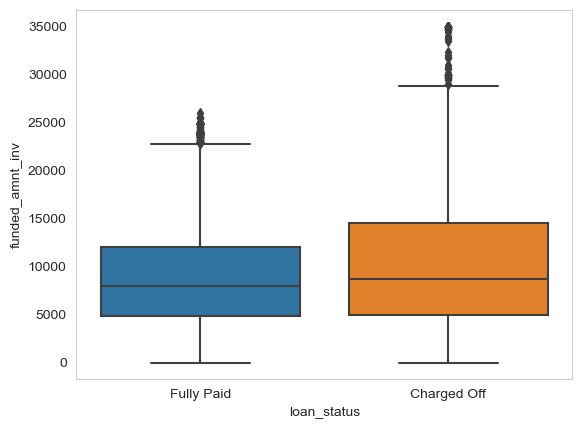

In [177]:
#funded_amnt_inv
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['funded_amnt_inv'])

Funded amount intuitively do not have an influence in deciding whether loans would be more risky or not and it is affirmed by the above plot whihc is ininconclusive.

# funded_amnt

In [178]:
#funded_amnt
loan_df.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,10937.105414,6924.385106,900.0,5025.0,10000.0,15000.0,35000.0
Fully Paid,28903.0,9095.976196,5124.136377,500.0,5000.0,8000.0,12000.0,26000.0


<Axes: xlabel='loan_status', ylabel='funded_amnt'>

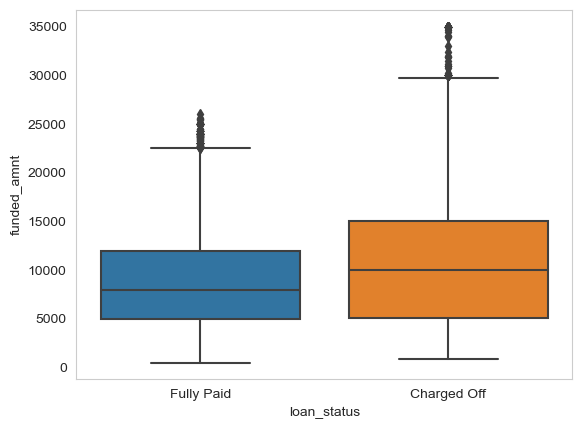

In [179]:
#funded_amnt
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['funded_amnt'])

Charged off loans have higher Funding values than Fully paid loans

# loan_amnt

In [180]:
#loan_amnt
loan_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,11264.678592,7287.104229,900.0,5187.5,10000.0,15250.0,35000.0
Fully Paid,28903.0,9315.977580,5408.603386,500.0,5000.0,8000.0,12300.0,35000.0


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

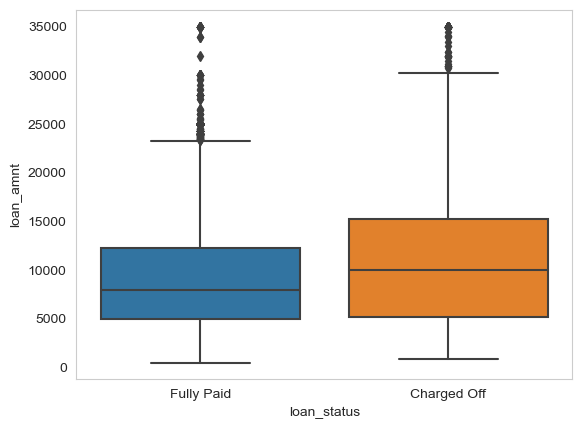

In [181]:
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['loan_amnt'])

In [182]:
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

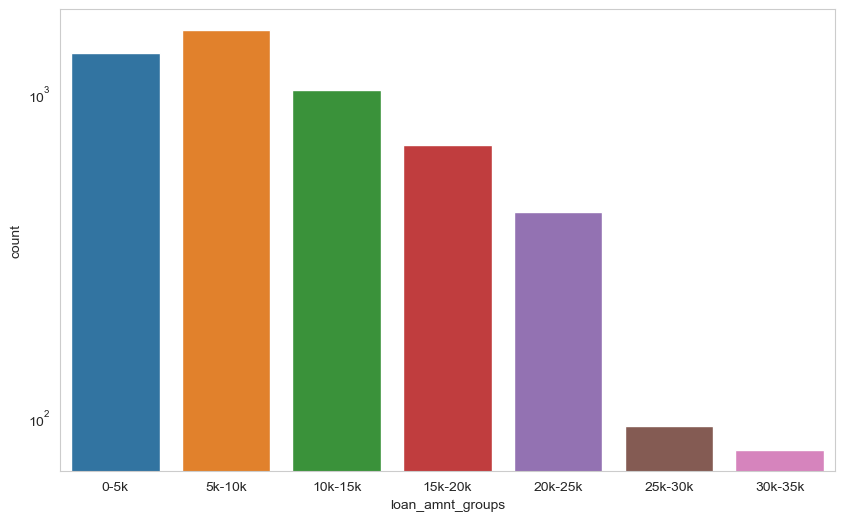

In [183]:
fig,ax = plt.subplots(figsize = (10,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

loan amount to Charged off loans are higher in comparison to Fully Paid

## Consolidated Insights from Univariate Analysis

1.Charged off loans have higher repayment period.it is observed that loan with higher term i.e. 60 months shows higher Charged off percentage. This is an indication to some extent that loans with higher term period are likely to default more.

2.Rental & Mortgage type of home ownership associated loans have higher no of Charged off and fully paid loans than rest categories however on a standalone basis this feature/variable does not hold much value to the analysis.

3.It is observed that around 49% of the charge off has happened due to debt_consolidation along with it displays higher charge-off loan-count% which indicates that 'debt consolidation' associated loans have a higher likeliness to default.

4.The verified borrower category has displayed larger charge off percentage (19.5%) along with larger no of loans which is an indication that this category (verified by LC) is more likely to default based on the dataset provided.

5.It can be inferred based on the observation above that loans belonging to sub prime grades i.e. as we move from A,B towards G we observe that the charge off percentage increases which indicates the the loans with sub-prime grades are much more riskier and much more likely to default.

6.Higher no of loans have been provided to borrowers with employment length more than 10yrs however since there is no conclusive evidence to verify that this feature can influence the likeliness of defaulting therefore on a standalone basis we believe this variable is not beneficial to the overall analysis.

7.Borrowers/Accounts with higher income are less likely to default.

8.It can be noted that the borrowers with higher debt to income ratios are likely to default more

9.Interest Rate, installment,earliest credit line year did not add any value to the overall analysis from a univariate analysis point of view.

10.Charged off loans are reported in Public Deregatory records twice the numbers in Fully Paid loans.

11.It is noted that borrowers associated with higher revolving utilization rate are more likely to default and are riskier given that the charge-off loan-count% increased with the increase in revol-util rates.

12.Charged off loans have higher Funding values than Fully paid loans.

13.Loan amount to Charged off loans are higher in comparison to Fully Paid.

14.It is observed that borrowers from Califfornia, New Jersey and Florida are more likely to default compared to other borrowers.

# Bivariate Analysis

### Plotting heat map to get correlation factor between Borrower financial attribute and Loan Attributes

In [184]:
loan_df.dtypes

member_id                     int64
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv             float64
term                          int64
int_rate                    float64
installment                 float64
grade                        object
sub_grade                    object
emp_title                    object
emp_length                  float64
home_ownership               object
annual_inc                  float64
verification_status          object
issue_d                      object
loan_status                  object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
dti                         float64
delinq_2yrs                   int64
earliest_cr_line             object
inq_last_6mths                int64
open_acc                      int64
pub_rec                       int64
revol_bal                     int64
revol_util                  

In [185]:
emp_length_cols = ['loan_amnt','term','int_rate','grade','home_ownership',
                   'annual_inc_cat', 'verification_status','dti', 'earliest_cr_line_yr_cat']

annual_inc_cols = ['loan_amnt','term','int_rate','grade','home_ownership','verification_status', 
                   'dti','earliest_cr_line_yr_cat']

dti_cols = ['loan_amnt','term','int_rate','grade','home_ownership','verification_status','earliest_cr_line_yr_cat']
           
loan_amnt_cols = ['int_rate', 'grade', 'home_ownership', 'verification_status', 'earliest_cr_line_yr_cat']

### Employment length vs Loan amount


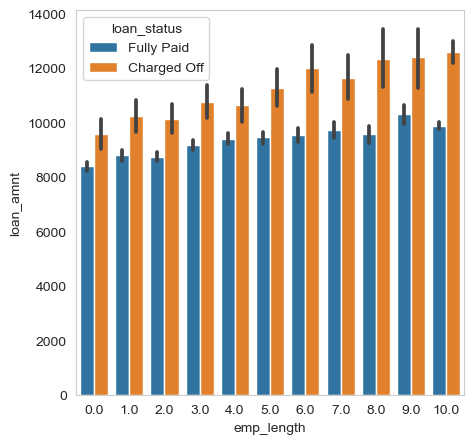

In [186]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

Higher Loan amount (approximately more than 10000) may lead to Charged Off, irrespective of Employment length

# Employment length vs loan term

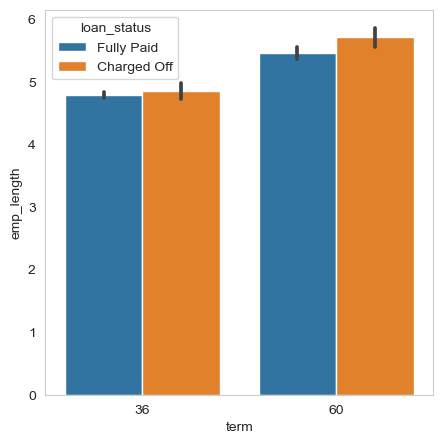

In [187]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['term'], y= loan_df['emp_length'], hue = loan_df['loan_status'])
plt.show()

Observation: It can be noted that the longer term loans (60 months) are provided to borrowers with higher employment length however it does not contribute much to the charged-off lans analysis.

# Employment Length vs Int Rate

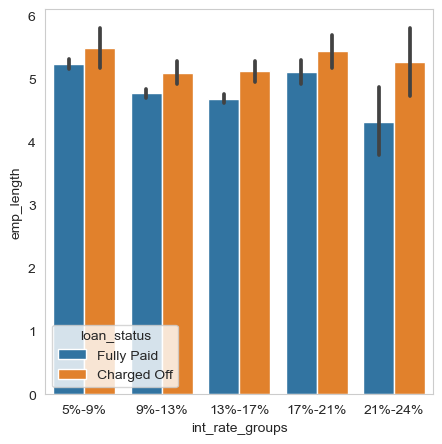

In [188]:
plt.figure(figsize = (5,5))
sns.barplot(y = loan_df['emp_length'] , x = loan_df['int_rate_groups'], hue = loan_df['loan_status'])
plt.show()

Observation: It is observed that there is more disparity between the emp. length of borrowers who are associated with the highest int rate category(21-24%) however there are no conclusive insights that add much value to the analysis.

# Employment Length vs Grade

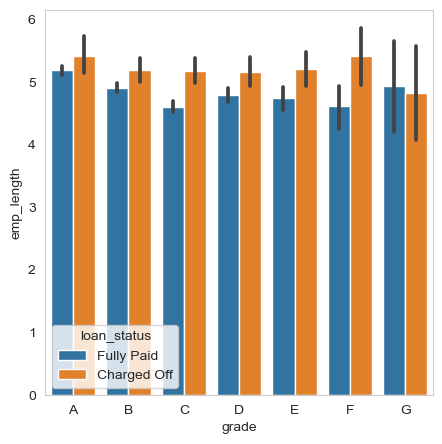

In [189]:
plt.figure(figsize = (5,5))
sns.barplot(y = loan_df['emp_length'] , x = loan_df['grade'].sort_values(), hue = loan_df['loan_status'])
plt.show()

The above plot does not provide any conclusive insights that add any value to the analysis.

# Employment Length vs Home ownership type

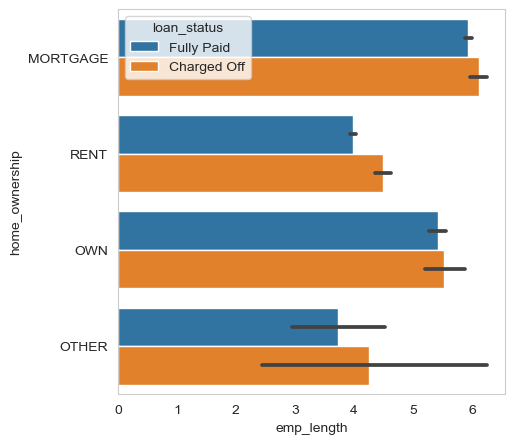

In [190]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['home_ownership'], hue = loan_df['loan_status'])
plt.show()

The above plot does not provide any conclusive insights that add any value to the analysis.

# Employment Length vs Annual Income

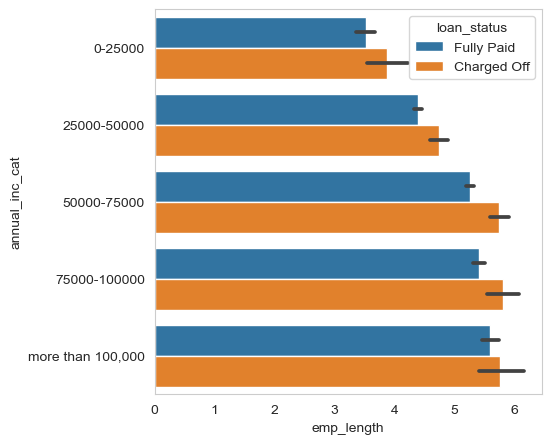

In [191]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['annual_inc_cat'].sort_values(), hue = loan_df['loan_status'])
plt.show()

It is observed that borrowers with higher annual income have higher employment length which is along expected lines however there is no visible difference between the charged off and fully paid loans and therefore there are no conclusive insights here.

# Employment Length vs DTI

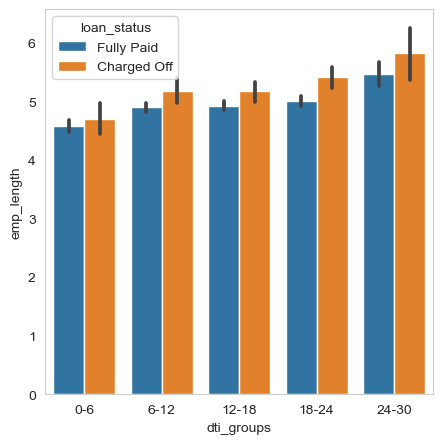

In [204]:
plt.figure(figsize = (5,5))
sns.barplot(y = loan_df['emp_length'] , x = loan_df['dti_groups'], hue = loan_df['loan_status'])
plt.show()

Observation : It can be noted from the above plot that in both fully paid and charged off loans the employment length increases with the increase in dti which indicates that people tend to take up higher debt in comparison to their income with increase in their employment duration which ultimately leads to higher likeliness of defaults. Therefore DTI along with employment length becomes a crucial indicator for identifying charged off loans.

# Employment Length vs Earliest Credit Line year

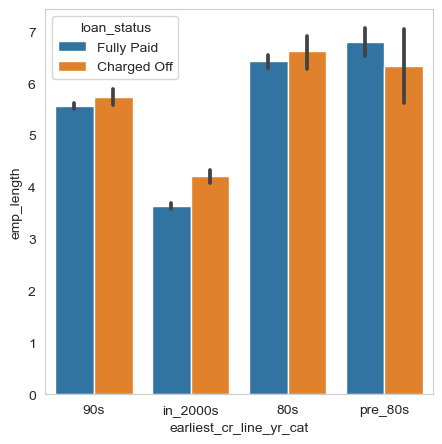

In [205]:
plt.figure(figsize = (5,5))
sns.barplot(y = loan_df['emp_length'] , x = loan_df['earliest_cr_line_yr_cat'], hue = loan_df['loan_status'])
plt.show()

Inference: the above plot provides an interesting observation that as we move from the pre80s(before year 1980) to the in2000s(year 2000 till present), the spread for employment length for borrowers defaulting has increased consistently through each category. This might be an indication that over time from before 1980 to the present, more no of borrowers with higher employment length have started to default and the gap has now reversed. While in pre80s the less experienced group used to default, this particular trend might have reversed in the recent times as the propensity to spend and acceptance of the credir culture has taken over.

#### Annual Income comaprison with 
['loan_amnt','term','int_rate','grade','home_ownership','verification_status','dti','earliest_cr_line_yr_cat']

# Annual Income vs loan amount

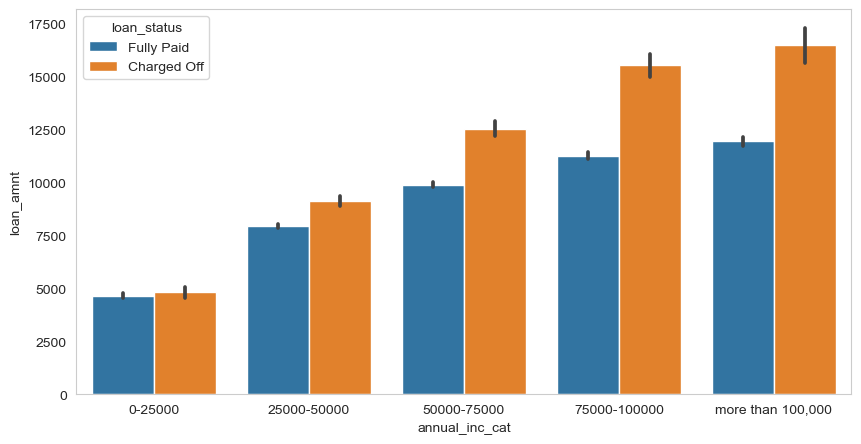

In [194]:
plt.figure(figsize = (10,5))
sns.barplot(x = loan_df['annual_inc_cat'].sort_values() , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

#Inference: Employees with higher annual income got the loan approved for a amount higher than what was appropriate
1. The loan amount is higher for the borrowers who defaulted 
2. The above plot provides an interesting insight that with higher increasing annual income the disparity between loan amount for fully-paid and charged-off has increased. This would indicate that there are majority of cases where higher loan amounts have been sanctioned on the basis of higher annual income which has led to an increase in the no of charged-off loans. Approving higher Loan amnount on the basis of high annual income might not be prudent.

# Annual Income vs DTI

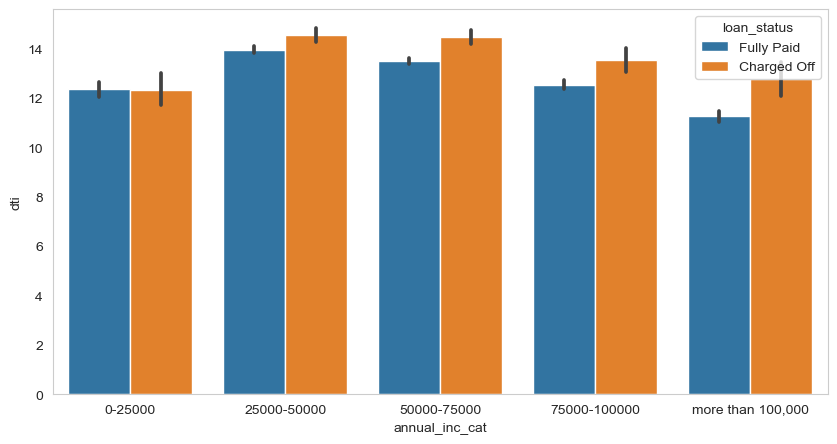

In [195]:
plt.figure(figsize = (10,5))
sns.barplot(x = loan_df['annual_inc_cat'].sort_values() , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

Observation: As per the univariate analysis, it has already been established that DTI and annual income and strong indicators for risk and probability of default. In combination we notice that the borrower groups with income (25000 -75000) showcase higher DTI compared to other groups. While this might not be a strong indicator however it can still be kept in consideration to identify the riskiness of borrowers.

# Loan Amount vs DTI

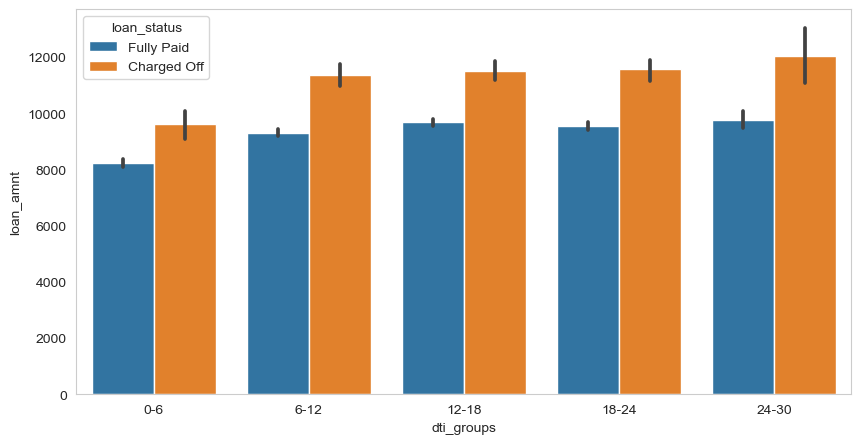

In [196]:
plt.figure(figsize = (10,5))
sns.barplot(y = loan_df['loan_amnt'] , x = loan_df['dti_groups'].sort_values(), hue = loan_df['loan_status'])
plt.show()

Observation: From the above plot it can be noted that charged-off loans showcase higher loan amount compared to fully-paid loans irrespective of DTI

# Loan Amount vs Home ownership

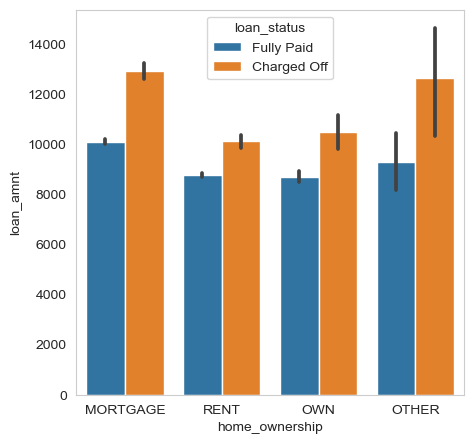

In [197]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['home_ownership'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

Observation: We notice a larger spread and higher loan amount associated with defaulted loans compared to fully paid loans under the Mortgage and Other home ownership categories

# Loan_amount vs Verification status

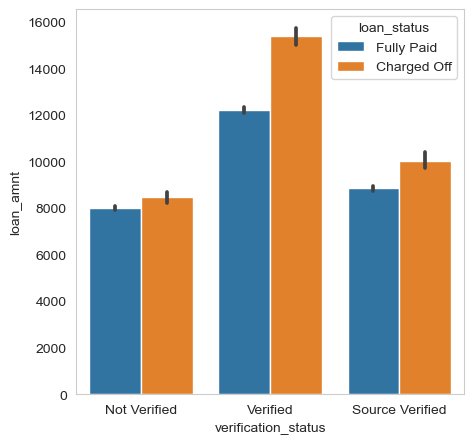

In [198]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['verification_status'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

Observation: From the above plot we are noticing that the borrowers verified by LC have been provided higher loan amounts. Additionally it can be noted that the charged-off loans are associated with higher loan amount. This to some extent indicates that verified borrowers tend to get higher loan amounts and thereby the likeliness to default also increases if we refer to our univariate analysis with loan amount and verification status separately.

# Purpose vs Loan Amount

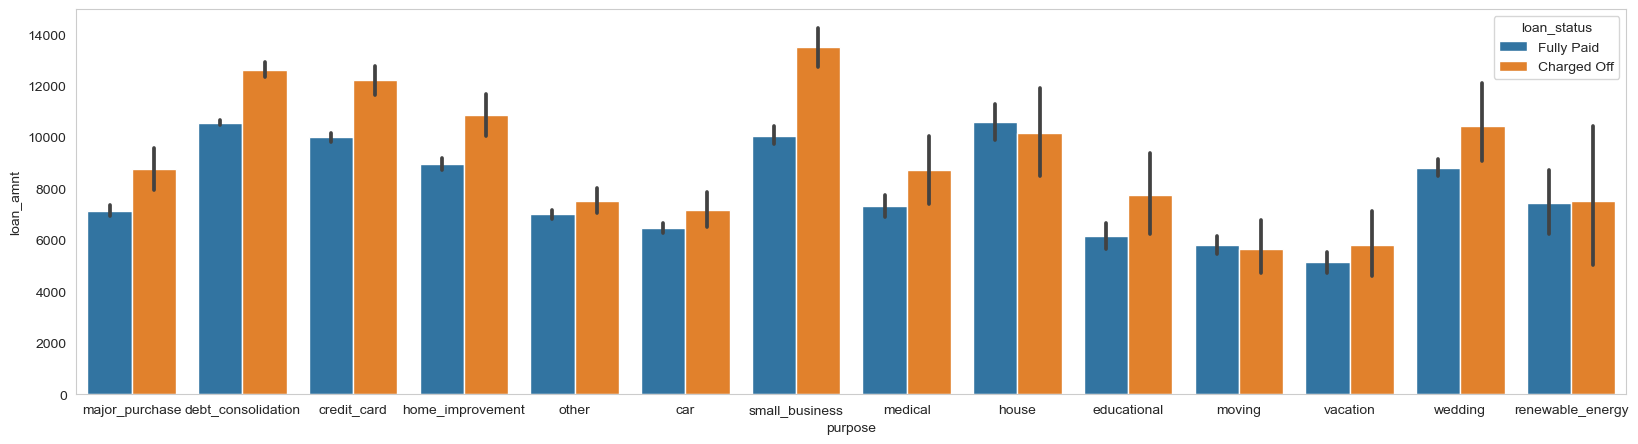

In [208]:
plt.figure(figsize = (20,5))
sns.barplot(x = loan_df['purpose'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

Observation: From the above plot it can be noted that for small business loans, the defaulted loans have a considerably higher loan amount associated compared to the fully paid loans. This can be an indication that there might be a need for limit setting for small business purpose loans which might be riskier given the purpose for which the loan is being used.

# Purpose vs Loan Term

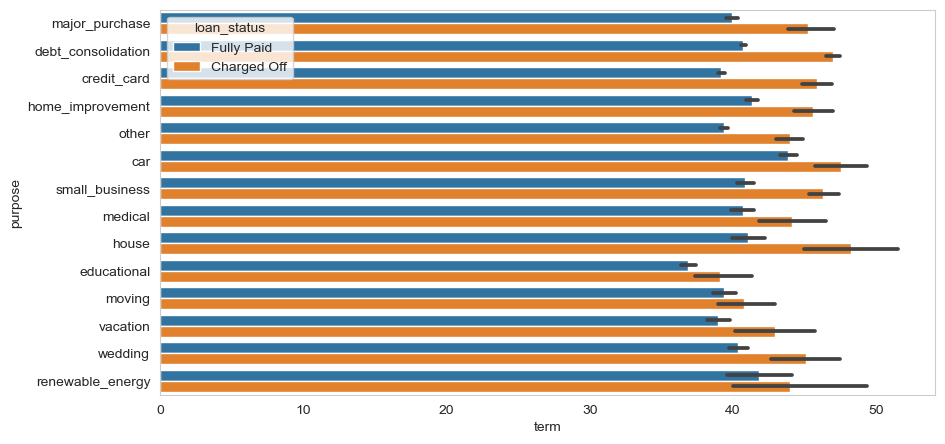

In [209]:
plt.figure(figsize = (10,5))
sns.barplot(y = loan_df['purpose'] , x = loan_df['term'], hue = loan_df['loan_status'])
plt.show()

Observation: From the above plot it can be noted that for housing and debt consolidation purposes, the defaulted loans have a considerably higher loan term compared to fully paid loans. This to some extent indicates that for housing and debt consolidation purposed loans are more likely to default with increasing loan term. 

# Purpose vs DTI

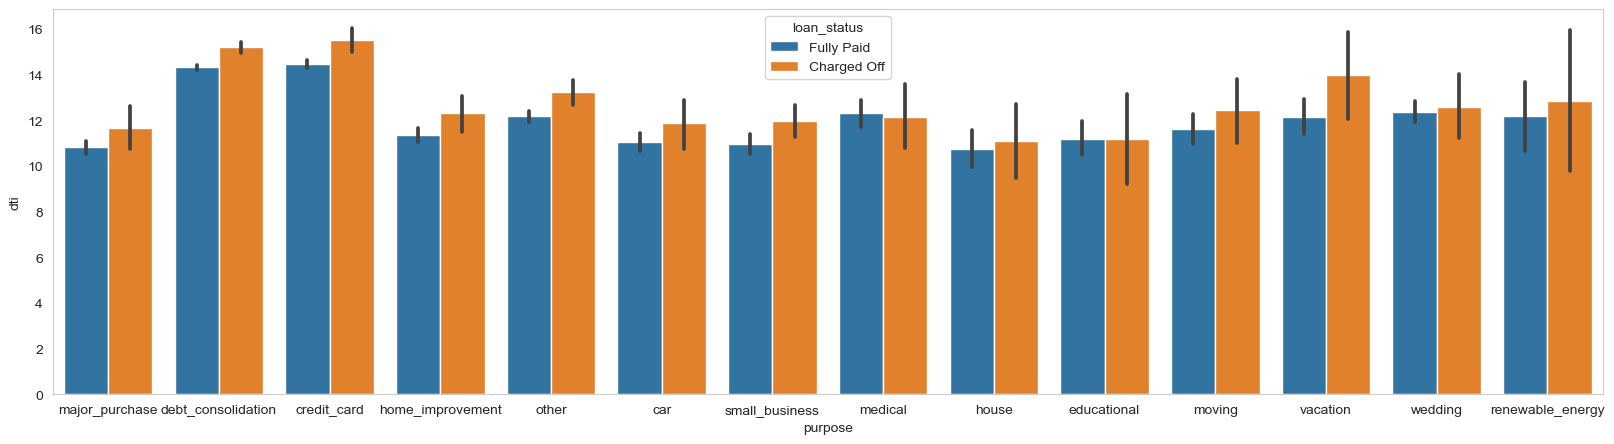

In [201]:
plt.figure(figsize = (20,5))
sns.barplot(x = loan_df['purpose'] , y = loan_df['dti'], hue = loan_df['loan_status'])
plt.show()

Observation: From the above plot it can be noted that loans for the purpose for debt consolidation, credit card and vacation are mostly availed by borrowers having higher debt to income ratio. Since higher DTI indicates more likeliness to default, it is important that based on this insight - such loans availed for purpose of debt consolidation, credit card and vacation should go through more approval processes to ensure the repayment capability of the borrower.

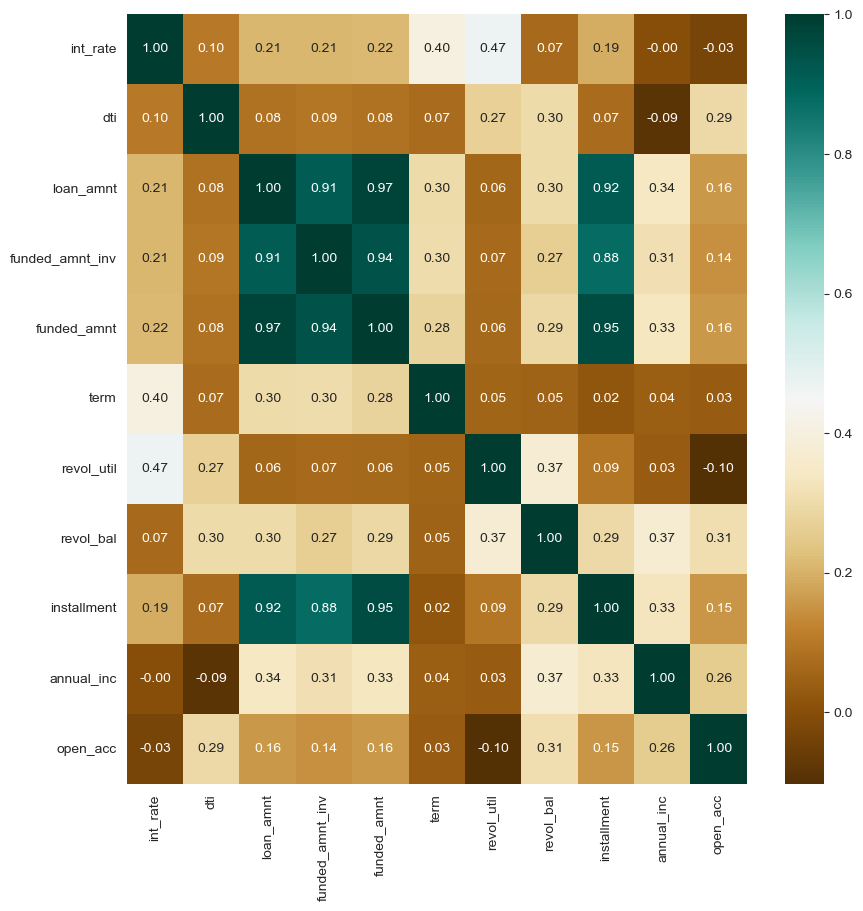

In [202]:
plt.figure(figsize = (10,10))
sns.heatmap(loan_df[['int_rate','dti', 'loan_amnt', 'funded_amnt_inv','funded_amnt', 'term', 'revol_util','revol_bal',
                     'installment','annual_inc', 'open_acc']].corr(), cmap='BrBG',
            annot = True, fmt = '.2f' )
plt.show()

# Consolidated Insights from Bivariate Analysis

1.Loans with higher Loan amount (approximately more than 10000) are more likely to default, irrespective of employment length

2.The employment length increases with the rise in dti among borrowers which indicates that people tend to take up higher debt in comparison to their income with increase in their employment duration which ultimately leads to higher likeliness of defaults.

3.There are majority of cases where higher loan amounts have been sanctioned on the basis of higher annual income which has led to an increase in the no of charged-off loans. Approving higher Loan amount on the basis of high annual income might not be prudent.

4.The borrower groups with income (25000 -75000) showcased higher DTI (which is an indicator for higher likeliness to default - refer univariate anlaysis for dti) compared to other groups. While this might not be a strong indicator however it can still be kept in consideration to identify the riskiness of borrowers.

5.We notice a larger spread and higher loan amount associated with defaulted loans compared to fully paid loans under the Mortgage and Other home ownership categories

6.Verified borrowers tend to get approval of higher loan amounts and thereby the likeliness to default also increases given that verified borrowers and higher loan amounts individually have higher likeliness to default(Refer univariate analysis).

7.For the loans towards purpose of small business, the defaulted loans have a considerably higher loan amount associated compared to the fully paid loans. This can be an indication that there might be a need for limit setting for small business purpose loans since these loans might be riskier given the purpose for which the loan is being used.

8.For housing and debt consolidation purposes, the defaulted loans have a considerably higher loan term compared to fully paid loans. This to some extent indicates that for housing and debt consolidation purposed loans are more likely to default with increasing loan term.

9.Loans for the purpose for debt consolidation, credit card and vacation are mostly availed by borrowers having higher debt to income ratio. Since higher DTI indicates more likeliness to default, it is important that based on this insight - such loans availed for purpose of debt consolidation, credit card and vacation should go through more approval processes to ensure the repayment capability of the borrower.

10.As we move from the pre80s(before year 1980) to the in2000s(year 2000 till present), the spread for employment length for borrowers defaulting has increased consistently through each category. This might be an indication that over time from before 1980 to the present, more no of borrowers with higher employment length have started to default and the gap has now reversed. While in pre80s the less experienced group used to default, this particular trend might have reversed in the recent times as the propensity to spend and acceptance of the credit culture has taken over.

# Final Recommendations

Major Driving factor which can be used to predict the chance of loans defaulting and reducing credit losses:

 1. Annual Income
 2. DTI
 3. Verification Status
 4. Grades
 5. Loan Amount

There is a higher probability of loans defaulting in the scenario where:

1.Higher loan amounts (>10,000) are approved on the basis of borrowers having higher annual income or longer duration of employment

2.Higher loan amounts are approved for verified borrowers

3.Loans approved for borrowers with sub prime grades (Lower than C to G)

4.loans are approved for Borrowers with annual income in the range of 25000-75000 which showcase higher DTI (greater than 14)

5.Borrowers are from California, New Jersey and Florida

6.Higher loan amounts(>10,000) are sanctioned for loans towards small business purpose

7.Loans are approved for purpose of debt consolidation and housing with higher term (>4years)

8.Loans are approved for purpose of debt consolidation, credit card and vacation to borrowers with higher DTI (>14)

9.Higher term loans (60 months) are given out